#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project investigates how factors like location, time, and victim details impact various crime categories in a dataset of 20,000 incidents. By analyzing features such as geographical coordinates and demographics, we aim to uncover patterns that enhance our understanding of crime. These insights could ultimately help improve community safety and law enforcement strategies.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/competitions/crime-cast-forecasting-crime-categories/data?select=train.csv
- The data consists of 22 column and  rows 20000.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [13]:
df = pd.read_csv('data/crime_data.csv')

#### Show Top 5 Records

In [14]:
df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03-09-2020 00:00,03-06-2020 00:00,1800,15,N Hollywood,1563,...,75,M,W,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345,13,Newton,1367,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605,13,Newton,1343,...,67,M,B,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11-08-2020 00:00,11-06-2020 00:00,1800,19,Mission,1924,...,61,M,H,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130,12,77th Street,1245,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


#### Show last 5 records

In [15]:
df.tail()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700,3,Southwest,303,...,51,M,H,501,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259,10,West Valley,1008,...,0,M,W,301,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400,8,West LA,849,...,42,M,H,102,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06-10-2020 00:00,06-10-2020 00:00,600,5,Harbor,558,...,76,F,H,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order
19999,DALTON AV,VERNON AV,34.0037,-118.3034,02/18/2020 12:00:00 AM,02/17/2020 12:00:00 AM,1800,3,Southwest,397,...,0,NaN,NaN,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes


#### Shape of the dataset

In [16]:
df.shape

(20000, 22)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  int64  
 7   Area_ID                20000 non-null  int64  
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  int64  
 10  Part 1-2               20000 non-null  int64  
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  int64  
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

### 2.2 Dataset information

- **Location**: Street address of the crime incident.
- **Cross_Street**: Cross street of the rounded address.
- **Latitude**: Latitude coordinates of the crime incident.
- **Longitude**: Longitude coordinates of the crime incident.
- **Date_Reported**: Date the incident was reported.
- **Date_Occurred**: Date the incident occurred.
- **Time_Occurred**: Time the incident occurred in 24-hour military time.
- **Area_ID**: LAPD's Geographic Area number.
- **Area_Name**: Name designation of the LAPD Geographic Area.
- **Reporting_District_no**: Reporting district number.
- **Part 1-2**: Crime classification.
- **Modus_Operandi**: Activities associated with the suspect.
- **Victim_Age**: Age of the victim.
- **Victim_Sex**: Gender of the victim.
- **Victim_Descent**: Descent code of the victim.
- **Premise_Code**: Premise code indicating the location of the crime.
- **Premise_Description**: Description of the premise code.
- **Weapon_Used_Code**: Weapon code indicating the type of weapon used.
- **Weapon_Description**: Description of the weapon code.
- **Status**: Status of the case.
- **Status_Description**: Description of the status code.
- **Crime_Category**: The category of the crime (Target Variable).


### 3. Data Checks to perform

- Check Missing values and handle them
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [18]:
df.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [19]:
df=df.drop('Cross_Street',axis=1) # almost 80% of dataset is null
df['Modus_Operandi']=df['Modus_Operandi'].fillna(df['Modus_Operandi'].mode()[0])
df['Victim_Sex']=df['Victim_Sex'].fillna(df['Victim_Sex'].mode()[0])
df['Victim_Descent']=df['Victim_Descent'].fillna(df['Victim_Descent'].mode()[0])
df['Weapon_Used_Code']=df['Weapon_Used_Code'].fillna(0.0) # as the na values in Weapon_Used_Code and Weapon_Description means that the weapon is not reported or Unknown so coded it to 0.0
df['Weapon_Description']=df['Weapon_Description'].fillna('Not Reported')
df['Premise_Description']=df['Premise_Description'].fillna('Unknown')


In [20]:
df.isna().sum()

Location                 0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
Crime_Category           0
dtype: int64

#### There are no missing values in the data set now

### 3.2 Check Duplicates

In [21]:
df.duplicated().sum()

np.int64(13)

### 13 duplicate rows 

In [22]:
df=df.drop_duplicates()

In [23]:
df.duplicated().sum()

np.int64(0)

### 3.3 Check data types

In [24]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19987 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               19987 non-null  object 
 1   Latitude               19987 non-null  float64
 2   Longitude              19987 non-null  float64
 3   Date_Reported          19987 non-null  object 
 4   Date_Occurred          19987 non-null  object 
 5   Time_Occurred          19987 non-null  int64  
 6   Area_ID                19987 non-null  int64  
 7   Area_Name              19987 non-null  object 
 8   Reporting_District_no  19987 non-null  int64  
 9   Part 1-2               19987 non-null  int64  
 10  Modus_Operandi         19987 non-null  object 
 11  Victim_Age             19987 non-null  int64  
 12  Victim_Sex             19987 non-null  object 
 13  Victim_Descent         19987 non-null  object 
 14  Premise_Code           19987 non-null  int64  
 15  Premise

### 3.4 Checking the number of unique values of each column

In [25]:
df.nunique()

Location                 12399
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        217
Weapon_Used_Code            58
Weapon_Description          58
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

### Convert the data types of columns that are categorical but currently have a dtype of int or float to object.

In [26]:
col=['Area_ID','Reporting_District_no','Part 1-2','Premise_Code','Weapon_Used_Code']
df[col]=df[col].astype('object')


### 3.5 Check statistics of data set

In [27]:
df.describe()

,Latitude,Longitude,Time_Occurred,Victim_Age
count,19987.000000,19987.000000,19987.000000,19987.000000
mean,33.940599,-117.892777,1352.428779,30.149497
std,2.127496,7.380116,645.997471,21.861242
min,0.000000,-118.663400,1.000000,-2.000000
25%,34.009200,-118.429700,930.000000,12.000000
50%,34.058700,-118.322900,1430.000000,31.000000
75%,34.165050,-118.274400,1900.000000,46.000000
max,34.328100,0.000000,2359.000000,99.000000


#### Insights

- The data suggests a concentration of incidents in Southern California with a significant number occurring in the afternoon.
- The average victim is in their early 30s, but the data may contain errors (e.g., negative age values) that should be cleaned for accurate analysis.
- The age distribution indicates that both minors and older adults are victims, highlighting the need for targeted interventions based on age demographics.

In [28]:
df= df[df['Victim_Age']>=0]

### 3.7 Exploring Data

In [29]:
df.head()

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,34.1522,-118.3910,03-09-2020 00:00,03-06-2020 00:00,1800,15,N Hollywood,1563,1,...,75,M,W,101,STREET,0.0,Not Reported,IC,Invest Cont,Property Crimes
1,45TH ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345,13,Newton,1367,1,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605,13,Newton,1343,2,...,67,M,B,501,SINGLE FAMILY DWELLING,0.0,Not Reported,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,34.2953,-118.4590,11-08-2020 00:00,11-06-2020 00:00,1800,19,Mission,1924,1,...,61,M,H,101,STREET,0.0,Not Reported,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130,12,77th Street,1245,1,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [30]:
# define numerical & categorical columns
numeric_features = df.select_dtypes(include='number').columns.tolist()
categorical_features = df.select_dtypes(exclude='number').columns.tolist()

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Latitude', 'Longitude', 'Time_Occurred', 'Victim_Age']

We have 17 categorical features : ['Location', 'Date_Reported', 'Date_Occurred', 'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category']


### 3.8 Extract Year,Month,Day and WeekDay from both Date_Reported and Date_Occurred

In [31]:
# Function to normalize date formats
def normalize_date(date_str):
    # Try parsing with the first format (MM/DD/YYYY)
    try:
        date_obj = datetime.strptime(date_str, '%m/%d/%Y %I:%M:%S %p')
    except ValueError:
        # If it fails, try parsing with the second format (MM-DD-YYYY)
        try:
            date_obj = datetime.strptime(date_str, '%m-%d-%Y %H:%M')
        except ValueError:
            return pd.NaT  # Return NaT if both formats fail
    return date_obj.strftime('%m-%d-%Y %H:%M')

# Apply the function to both date columns
df['Date_Reported'] =pd.to_datetime(df['Date_Reported'].apply(normalize_date))
df['Date_Occurred'] =pd.to_datetime(df['Date_Occurred'].apply(normalize_date))

# Function to convert Time_Occurred to hours
def convert_to_hours(time):
    # Extract hours and minutes
    hours = time // 100          # Integer division to get the hour
    minutes = time % 100         # Modulus to get the minutes
    # Convert to decimal format if needed
    return hours + minutes / 60   # Return total hours as a decimal

# Apply the function to the Time_Occurred column
df['Hours_Occurred'] = df['Time_Occurred'].apply(convert_to_hours)
df=df.drop('Time_Occurred',axis=1)

In [32]:
# Extract features from Date_Reported
df['Reported_Year'] = df['Date_Reported'].dt.year
df['Reported_Month'] = df['Date_Reported'].dt.month
df['Reported_Day'] = df['Date_Reported'].dt.day
df['Reported_Weekday'] = df['Date_Reported'].dt.weekday

# Extract features from Date_Occurred
df['Occurred_Year'] = df['Date_Occurred'].dt.year
df['Occurred_Month'] = df['Date_Occurred'].dt.month
df['Occurred_Day'] = df['Date_Occurred'].dt.day
df['Occurred_Weekday'] = df['Date_Occurred'].dt.weekday


In [33]:
# Calculate time difference in hours (or any other unit you prefer)
df['Time_Difference'] = (df['Date_Reported'] - df['Date_Occurred']).dt.total_seconds() / 3600  # in hours


In [34]:
"""

df['Modus_Operandi_split']=df['Modus_Operandi'].apply(lambda x : x.split())
exploded_df=df.explode('Modus_Operandi_split')
exploded_df = exploded_df.rename(columns={'Modus_Operandi_Split': 'Modus_Operandi_Code'})
exploded_df = exploded_df.drop(columns=['Modus_Operandi'])
df=df.drop('Modus_Operandi_split',axis=1)
exploded_df.info()

"""


"\n\ndf['Modus_Operandi_split']=df['Modus_Operandi'].apply(lambda x : x.split())\nexploded_df=df.explode('Modus_Operandi_split')\nexploded_df = exploded_df.rename(columns={'Modus_Operandi_Split': 'Modus_Operandi_Code'})\nexploded_df = exploded_df.drop(columns=['Modus_Operandi'])\ndf=df.drop('Modus_Operandi_split',axis=1)\nexploded_df.info()\n\n"

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

In [35]:
df.describe()

,Latitude,Longitude,Date_Reported,Date_Occurred,Victim_Age,Hours_Occurred,Reported_Year,Reported_Month,Reported_Day,Reported_Weekday,Occurred_Year,Occurred_Month,Occurred_Day,Occurred_Weekday,Time_Difference
count,19981.000000,19981.000000,19981,19981,19981.000000,19981.000000,19981.000000,19981.000000,19981.000000,19981.000000,19981.0,19981.000000,19981.000000,19981.000000,19981.000000
mean,33.940546,-117.892612,2020-07-20 17:32:46.568239872,2020-06-28 20:07:00.159151360,30.158951,13.640011,2020.061208,6.409689,15.791702,2.868475,2020.0,6.432361,15.568440,3.022371,525.429558
min,0.000000,-118.663400,2020-01-01 00:00:00,2020-01-01 00:00:00,0.000000,0.016667,2020.000000,1.000000,1.000000,0.000000,2020.0,1.000000,1.000000,0.000000,0.000000
25%,34.009200,-118.429700,2020-04-06 00:00:00,2020-03-29 00:00:00,12.000000,9.500000,2020.000000,3.000000,8.000000,1.000000,2020.0,3.000000,8.000000,1.000000,0.000000
50%,34.058700,-118.322700,2020-07-09 00:00:00,2020-06-28 00:00:00,31.000000,14.500000,2020.000000,6.000000,16.000000,3.000000,2020.0,6.000000,16.000000,3.000000,0.000000
75%,34.165000,-118.274400,2020-10-10 00:00:00,2020-09-28 00:00:00,46.000000,19.000000,2020.000000,9.000000,23.000000,5.000000,2020.0,9.000000,23.000000,5.000000,48.000000
max,34.328100,0.000000,2024-01-23 00:00:00,2020-12-31 00:00:00,99.000000,23.983333,2024.000000,12.000000,31.000000,6.000000,2020.0,12.000000,31.000000,6.000000,34488.000000
std,2.127813,7.381218,NaN,NaN,21.857713,6.460825,0.332893,3.452729,8.821557,1.971270,0.0,3.459922,8.941831,1.976805,2775.415172


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19981 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               19981 non-null  object        
 1   Latitude               19981 non-null  float64       
 2   Longitude              19981 non-null  float64       
 3   Date_Reported          19981 non-null  datetime64[ns]
 4   Date_Occurred          19981 non-null  datetime64[ns]
 5   Area_ID                19981 non-null  object        
 6   Area_Name              19981 non-null  object        
 7   Reporting_District_no  19981 non-null  object        
 8   Part 1-2               19981 non-null  object        
 9   Modus_Operandi         19981 non-null  object        
 10  Victim_Age             19981 non-null  int64         
 11  Victim_Sex             19981 non-null  object        
 12  Victim_Descent         19981 non-null  object        
 13  Premis

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

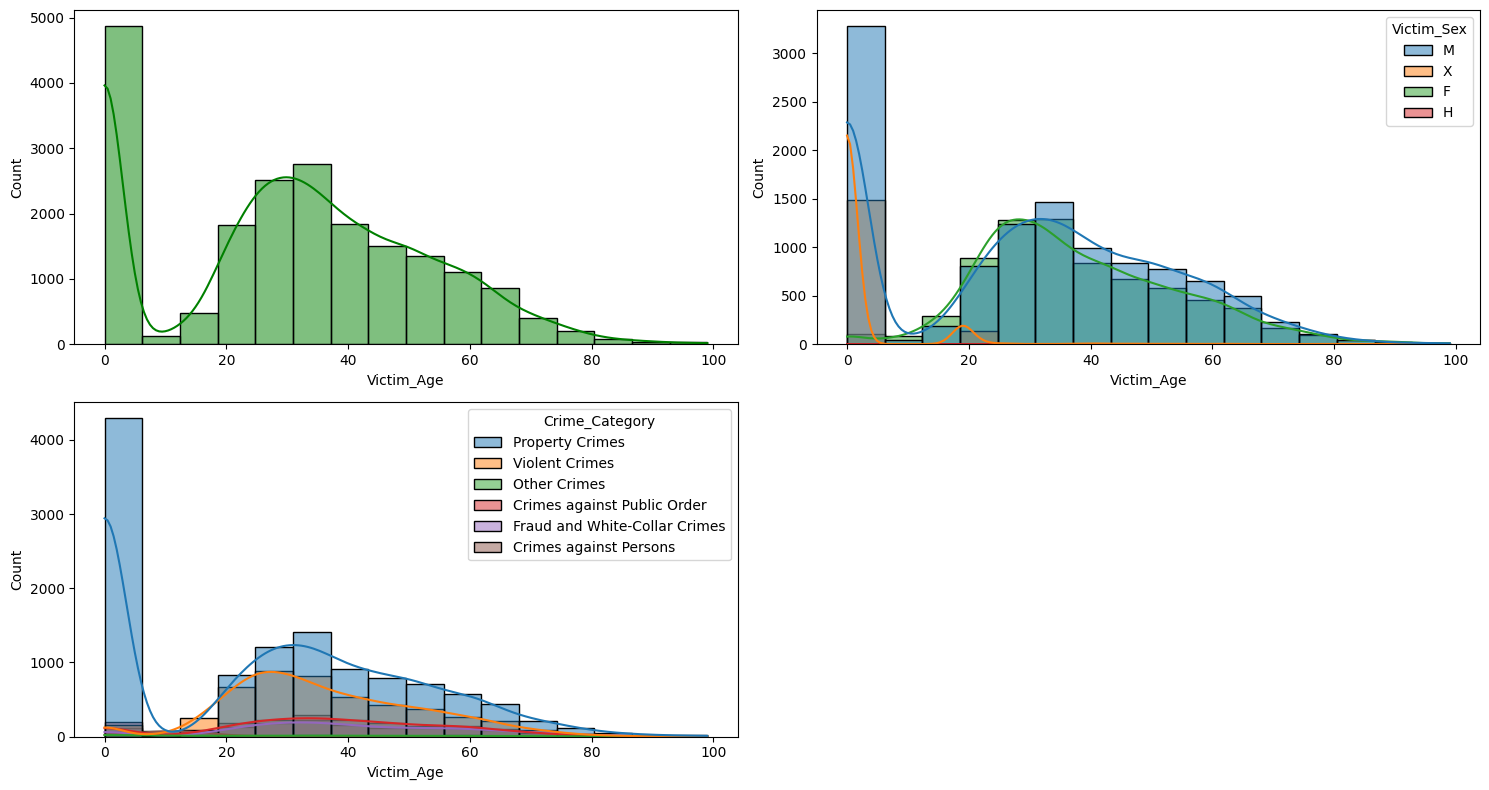

In [37]:
bins= int(np.ceil(np.log2(len(df['Victim_Age'])) + 1))  # Sturges' Rule
fig, axs =plt.subplots(2,2,figsize=(15,8))
plt.subplot(221)
sns.histplot(data=df,x='Victim_Age',bins=bins,kde=True,color='g')
plt.subplot(222)
sns.histplot(data=df,x='Victim_Age',bins=bins,hue='Victim_Sex',kde=True)
plt.subplot(223)
sns.histplot(data=df,x='Victim_Age',bins=bins,hue='Crime_Category',kde=True)
axs[1,1].axis('off')
plt.tight_layout()
plt.show()

#### Insights
- Most of the victims are newborn babies, regardless of gender.
- After newborn babies, the next most common victims are of age range 25 to 35 years for Male ,Female and Homosexual. While Non-binary/unknown tend to be victims in the age range of 25 to 35.
- Most of the newborn victims are involved in property crimes.
- In most of  crime categories, victims are typically aged around 25 to 35 years.


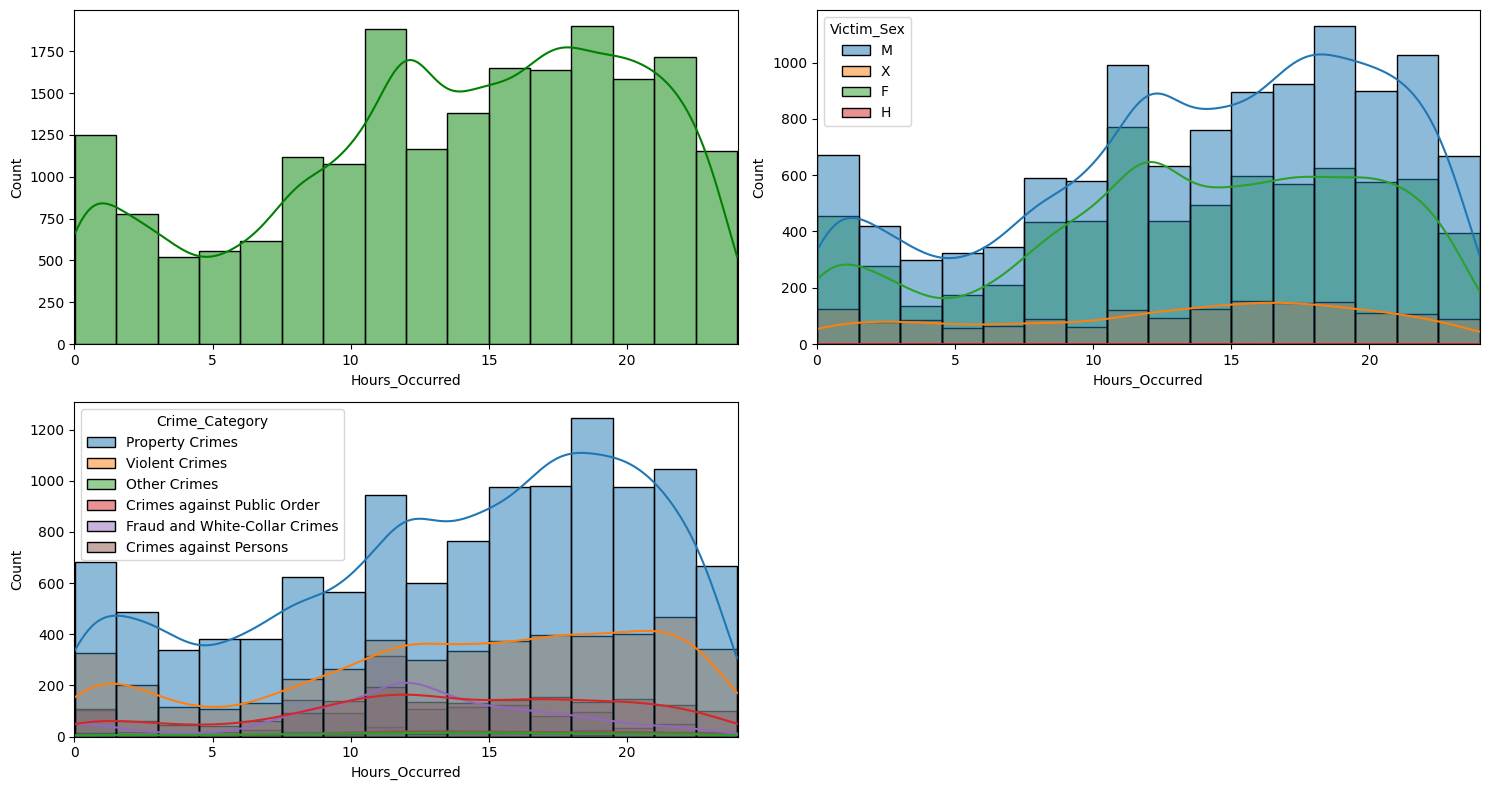

In [38]:
bins= int(np.ceil(np.log2(len(df['Hours_Occurred'])) + 1))  # Sturges' Rule
fig, axs =plt.subplots(2,2,figsize=(15,8))
plt.subplot(221)
sns.histplot(data=df,x='Hours_Occurred',bins=bins,kde=True,color='g')
axs[0,0].set_xlim(0, 24)
plt.subplot(222)
sns.histplot(data=df,x='Hours_Occurred',bins=bins,hue='Victim_Sex',kde=True)
axs[0,1].set_xlim(0, 24)
plt.subplot(223)
sns.histplot(data=df,x='Hours_Occurred',bins=bins,hue='Crime_Category',kde=True)
axs[1,0].set_xlim(0, 24)
axs[1,1].axis('off')
plt.tight_layout()
plt.show()

#### Insights
- Most crimes occur in the afternoon from 11 AM to 1 PM and in the evening from 4 PM to 7 PM.
- Property crimes mostly occur in the evening, while 'Fraud and White-Collar Crimes' typically happen during office hours from 10 AM to 3 PM.
- Crimes other than 'Fraud and White-Collar Crimes' show similar trends, with most occurring in the evening.
- For males and females, crime trends are almost the same, with most crimes occurring in the afternoon from 11 AM to 1 PM and in the evening from 4 PM to 7 PM.
- For non-binary/unknown individuals, crime timings are almost uniformly distributed, while crimes involving homosexuals are relatively infrequent.


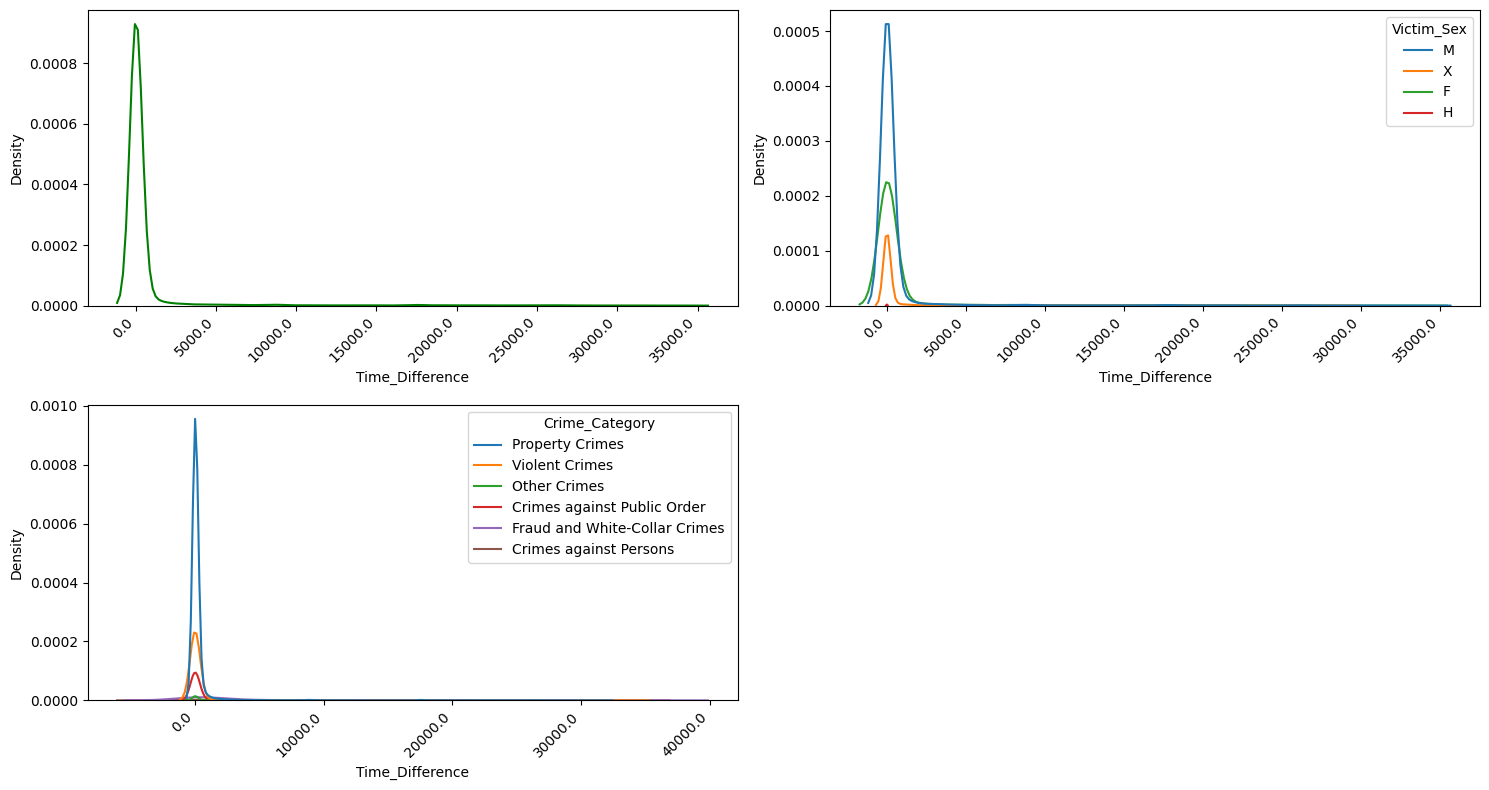

In [39]:
bins= int(np.ceil(np.log2(len(df['Time_Difference'])) + 1))  # Sturges' Rule
fig, axs =plt.subplots(2,2,figsize=(15,8))
plt.subplot(221)
sns.kdeplot(data=df,x='Time_Difference',color='g')
axs[0,0].set_xticklabels(axs[0,0].get_xticks(), rotation=45, ha='right')  

plt.subplot(222)
sns.kdeplot(data=df,x='Time_Difference',hue='Victim_Sex')
axs[0,1].set_xticklabels(axs[0,1].get_xticks(), rotation=45, ha='right')  

plt.subplot(223)
sns.kdeplot(data=df,x='Time_Difference',hue='Crime_Category')
axs[1,0].set_xticklabels(axs[1,0].get_xticks(), rotation=45, ha='right') 
axs[1,1].axis('off')
plt.tight_layout()
plt.show()

#### Insights
**Time difference** is the difference between the time when a crime occurred and the time when it was reported.
- In most cases, the time difference is short, suggesting that crimes are reported shortly after they occur. This insight is independent of gender and crime category.


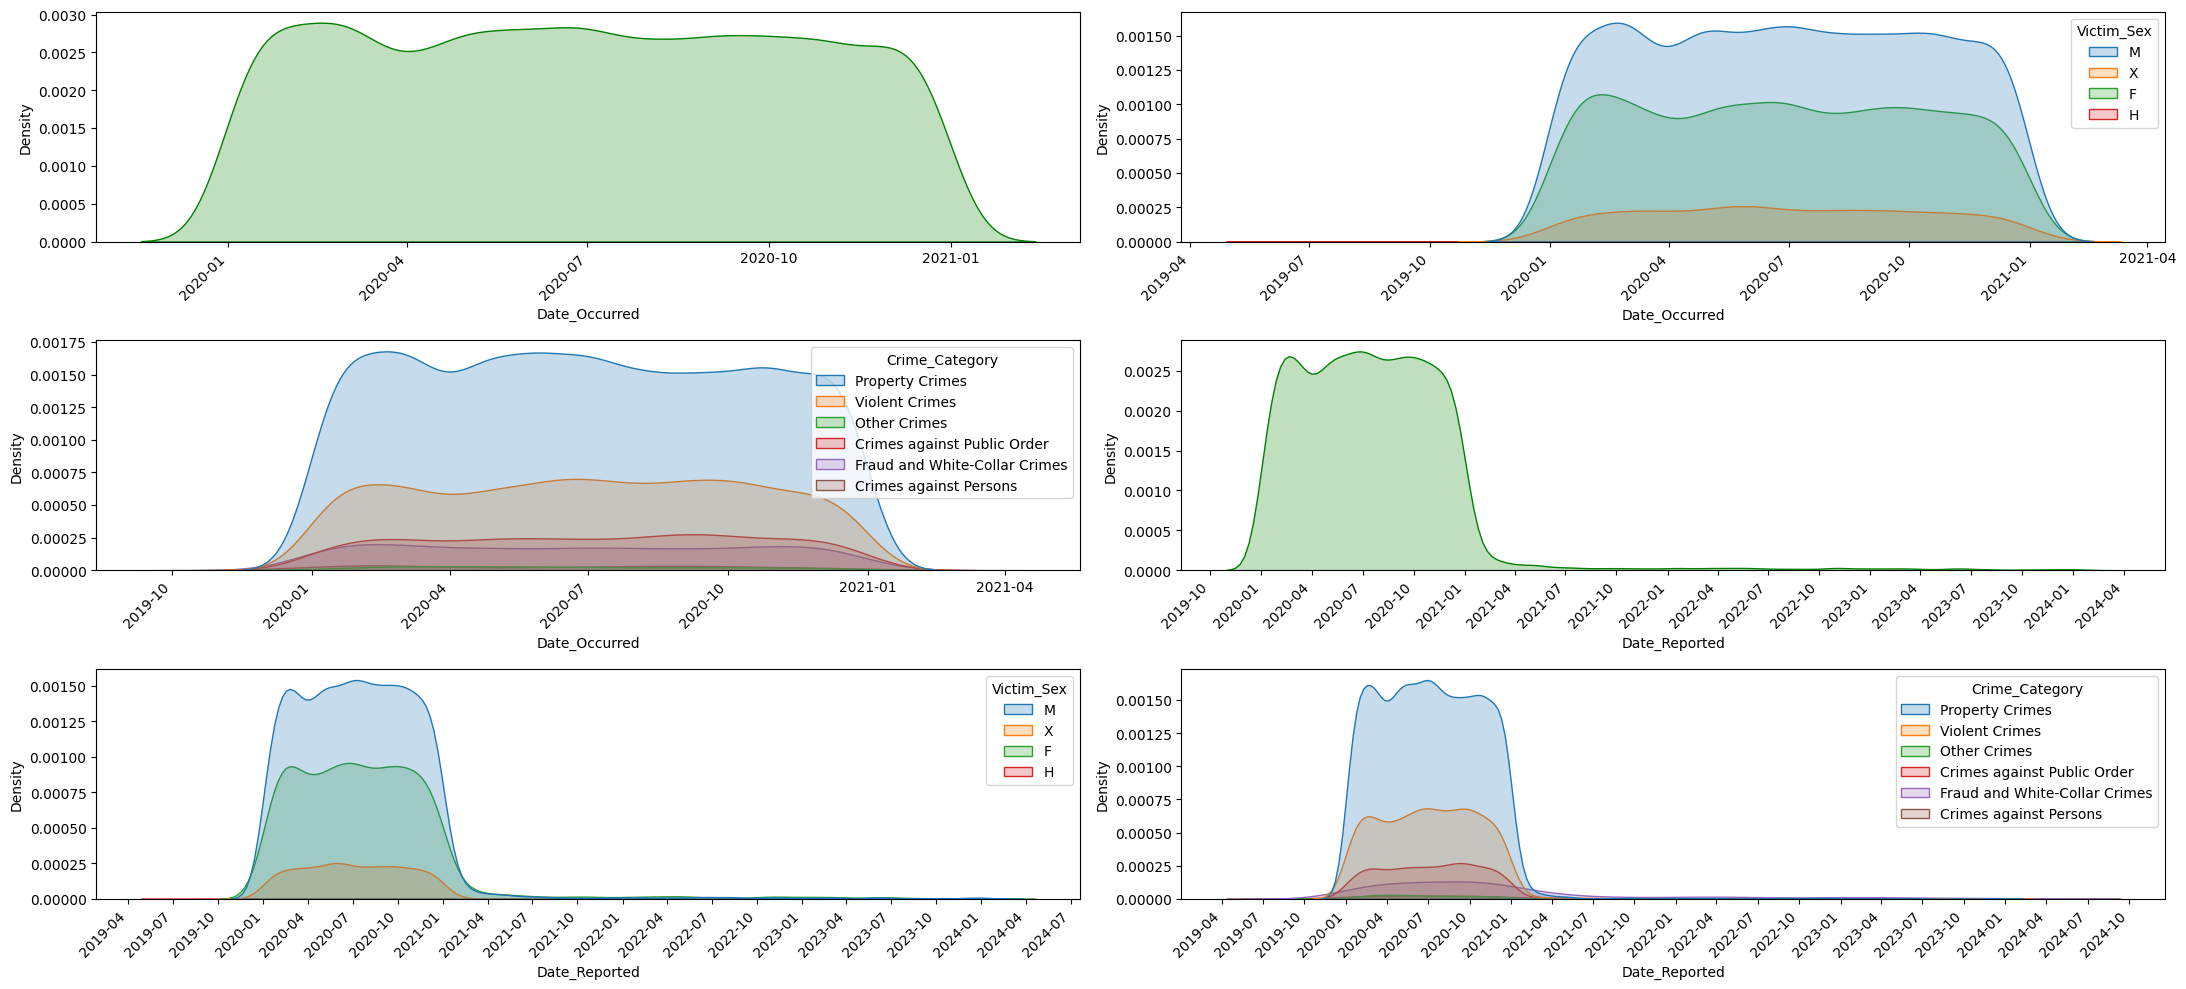

In [40]:
fig, axs = plt.subplots(3, 2, figsize=(22,10))


plt.subplot(321)
# KDE plot for Date_Occurred
sns.kdeplot(data=df, x='Date_Occurred', fill=True, color='g')

plt.subplot(322)
# KDE plot for Date_Occurred with Victim_Sex hue
sns.kdeplot(data=df, x='Date_Occurred', hue='Victim_Sex', fill=True)

plt.subplot(323)
# KDE plot for Date_Occurred with Crime_Category hue
sns.kdeplot(data=df, x='Date_Occurred', hue='Crime_Category', fill=True)

plt.subplot(324)
# KDE plot for Date_Reported
sns.kdeplot(data=df, x='Date_Reported', fill=True, color='g')

plt.subplot(325)
# KDE plot for Date_Reported with Victim_Sex hue
sns.kdeplot(data=df, x='Date_Reported', hue='Victim_Sex', fill=True)

plt.subplot(326)
# KDE plot for Date_Reported with Crime_Category hue
sns.kdeplot(data=df, x='Date_Reported', hue='Crime_Category', fill=True)


date_format = mdates.DateFormatter('%Y-%m')
interval = mdates.MonthLocator(interval=3)  

for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(interval)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()


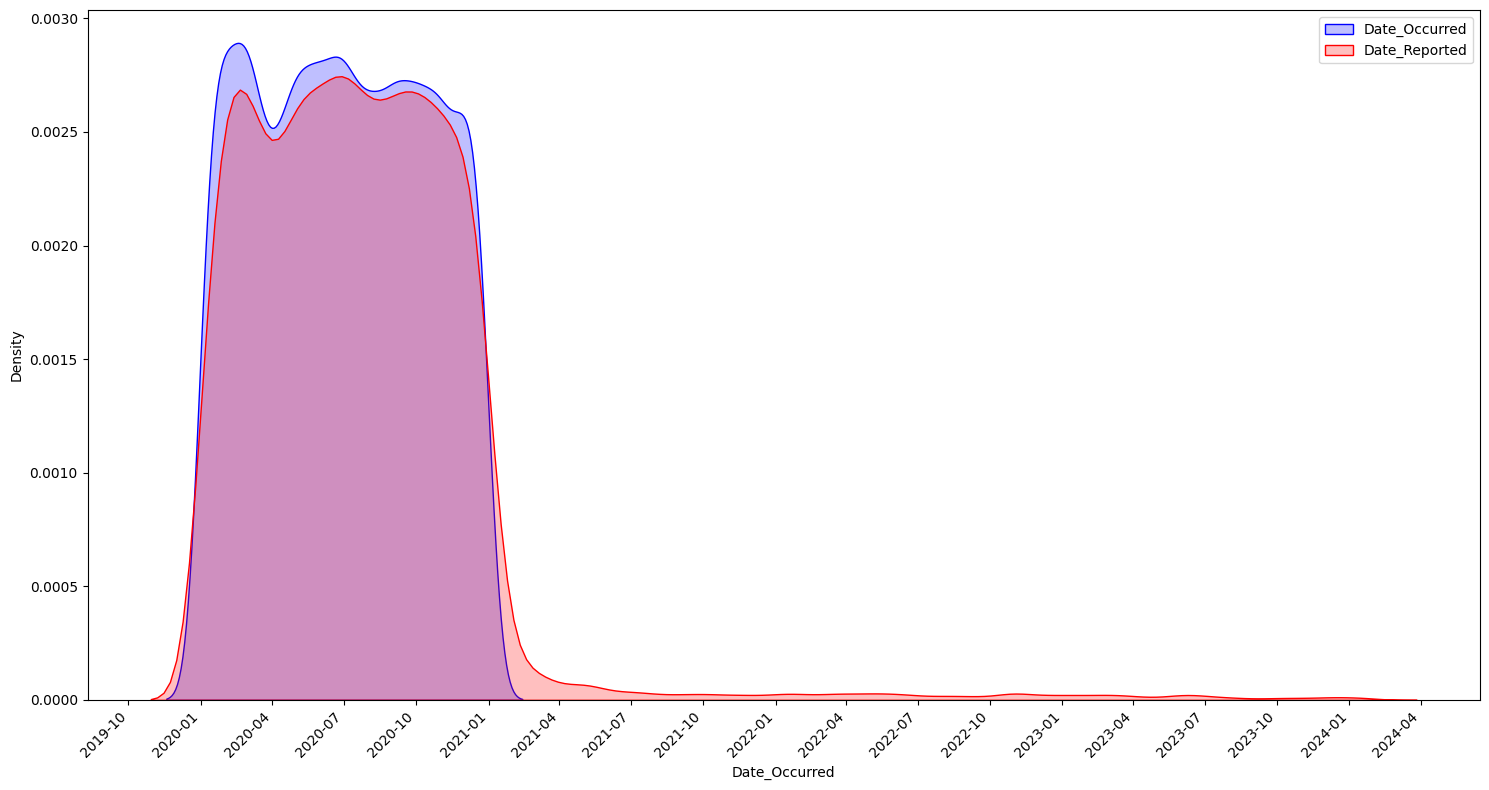

In [41]:
# Create a figure with a specified size
plt.figure(figsize=(15, 8))

# KDE plot for Date_Occurred and Date_Reported
sns.kdeplot(data=df, x='Date_Occurred', fill=True, color='blue', label='Date_Occurred')
sns.kdeplot(data=df, x='Date_Reported', fill=True, color='red', label='Date_Reported')
plt.legend()
# Formatting date axis
date_format = mdates.DateFormatter('%Y-%m')
interval = mdates.MonthLocator(interval=3)
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(interval)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Insights
- When crimes occur and when they are reported are both almost uniformly distributed over the period of the year 2020, regardless of victim gender and crime category.
- This indicates that there is no significant variation in the timing of crime occurrences and reports throughout the year.

#### 4.2 Maximum Age of Victims


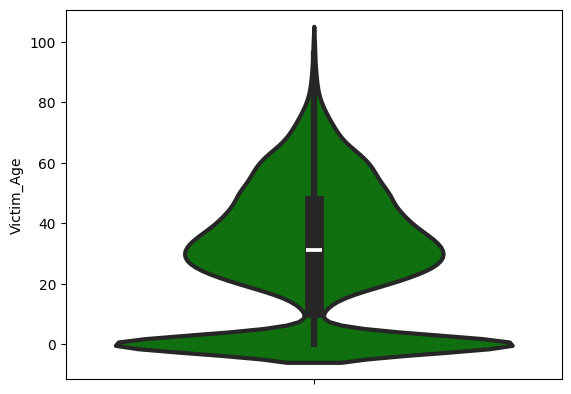

In [42]:

sns.violinplot(y='Victim_Age',data=df,color='g',linewidth=3)
plt.show()

#### Insight
- Most of the victims are **newborns** and between the ages of **20 to 40** .


#### 4.3 Multivariate analysis using pieplot

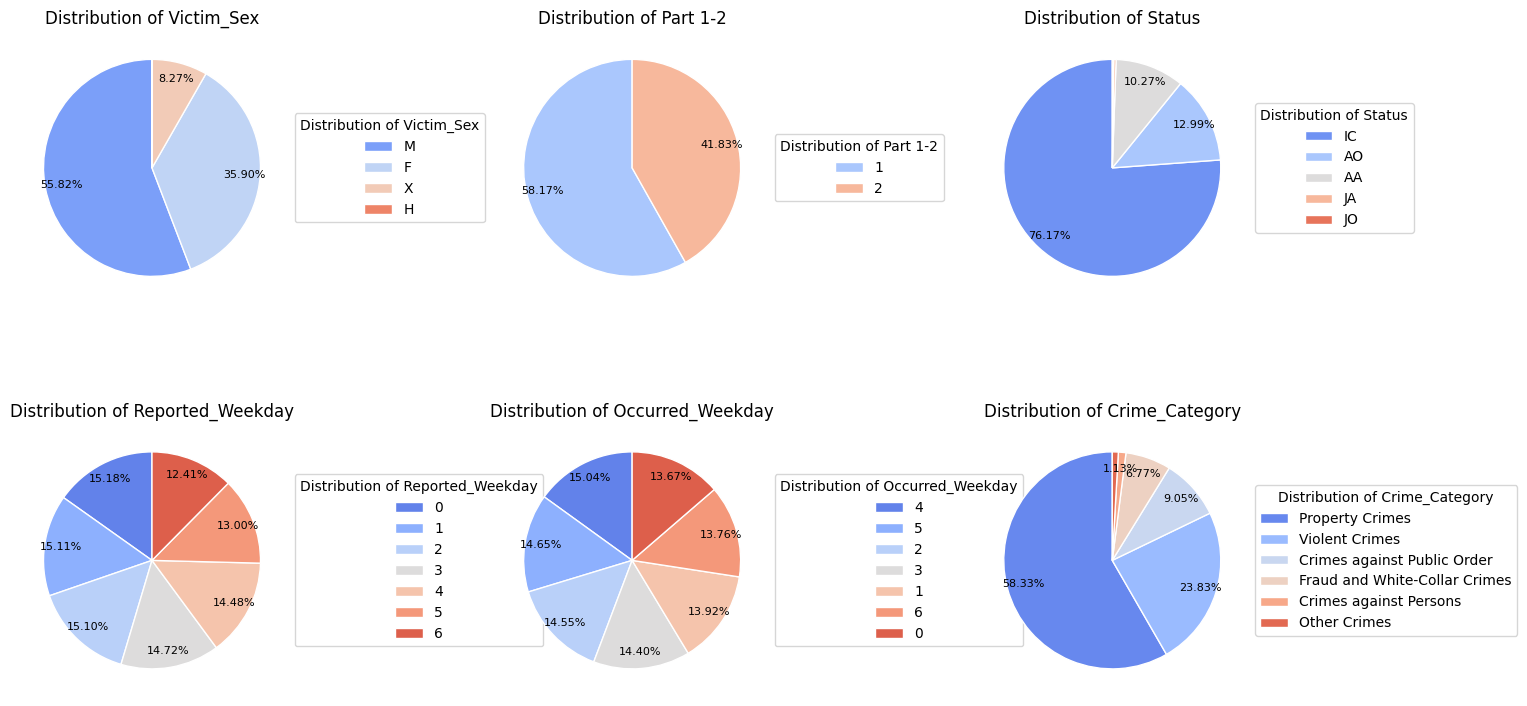

In [43]:

sex_count = df['Victim_Sex'].value_counts()
part_count = df['Part 1-2'].value_counts()
status_count = df['Status'].value_counts()
Reported_Weekday_count = df['Reported_Weekday'].value_counts()
Occurred_Weekday_count = df['Occurred_Weekday'].value_counts()
Crime_Category_count = df['Crime_Category'].value_counts()

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
def autopct_func(pct):
        return ('%1.2f%%' % pct) if pct > 1 else ''
    

def plot_pie(ax, data, title):
    
    wedges, texts, autotexts = ax.pie(
        x=data, startangle=90, colors=sns.color_palette("coolwarm", len(data)),
        autopct=autopct_func, pctdistance=0.85, labeldistance=1.2, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )

    # Adjust font size and color of percentage labels
    for autotext in autotexts:
        autotext.set_fontsize(8)
        autotext.set_color('black')
    
    ax.set_title(title)
    ax.legend(wedges, data.index, title=title, loc="center left", bbox_to_anchor=(1, 0.5))

plot_pie(axs[0, 0], sex_count, 'Distribution of Victim_Sex')
plot_pie(axs[0, 1], part_count, 'Distribution of Part 1-2')
plot_pie(axs[0, 2], status_count, 'Distribution of Status')
plot_pie(axs[1, 0], Reported_Weekday_count, 'Distribution of Reported_Weekday')
plot_pie(axs[1, 1], Occurred_Weekday_count, 'Distribution of Occurred_Weekday')
plot_pie(axs[1, 2], Crime_Category_count, 'Distribution of Crime_Category')

plt.tight_layout()
plt.show()




#### Insights 

1. **Victim Gender**:
   - **More Males**: Most crime victims are male. Non-binary individuals are also notably represented, while homosexuals are very few.

2. **Type of Crimes**:
   - **Part-1 Crimes Are More Common**: More serious crimes (Part-1) are more frequent than less serious ones (Part-2).

3. **Case Status**:
   - **Most Cases Resolved**: Most crimes are solved, but arrests are less common, and juvenile cases are rare.

4. **Crime Reporting**:
   - **Consistent Throughout the Week**: Crimes and reports are evenly spread across all days of the week.

5. **Crime Categories**:
   - **Property Crimes**: The most common, requiring focus.
   - **Violent Crimes**: Significant but less frequent.
   - **Public Order Crimes**: Less common but still important.
   - **Fraud and White-Collar Crimes**: Less frequent, but notable.
   - **Crimes Against Persons and Other Crimes**: Rare, but should not be overlooked.



#### 4.4 Feature Wise Visualization
#### 4.4.1 Victim_Sex COLUMN
- How is distribution of Victim's Sex ?
- Is Sex has any impact on Crime Category ?

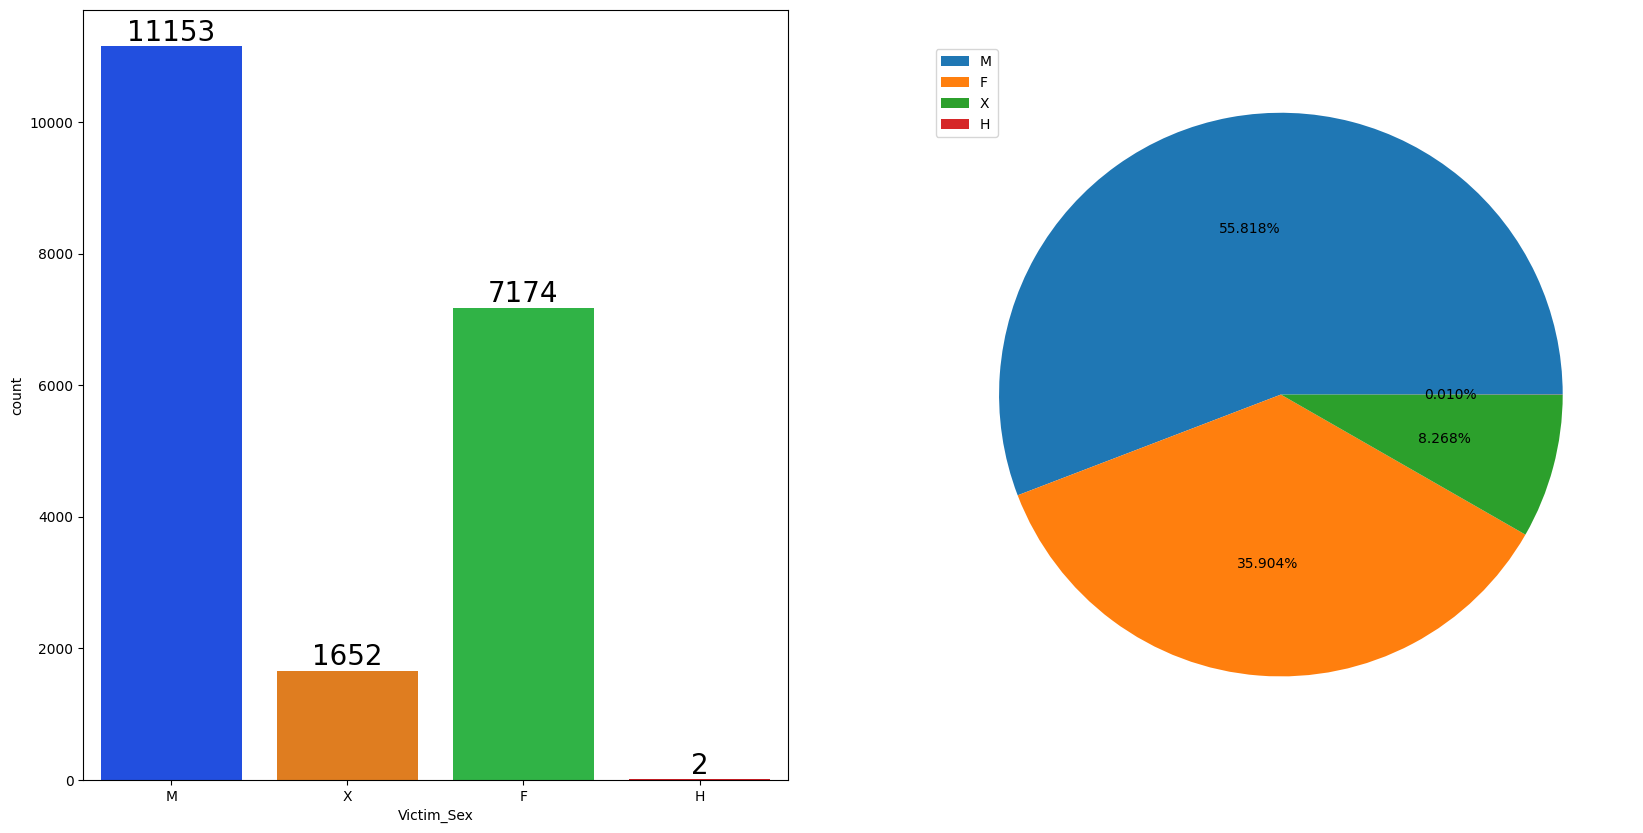

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(data=df,x='Victim_Sex',palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(122)
plt.pie(sex_count,labels=None,autopct='%1.3f%%')
plt.legend(sex_count.index,loc='upper left')

plt.show()



#### Insights

  - The data shows that most crime victims are male, followed by females. Non-binary and unknown genders are less common, and homosexual victims are extremely rare.


#### BIVARIATE ANALYSIS ( Is Victim_Sex has any impact on Crime_Category ? ) 


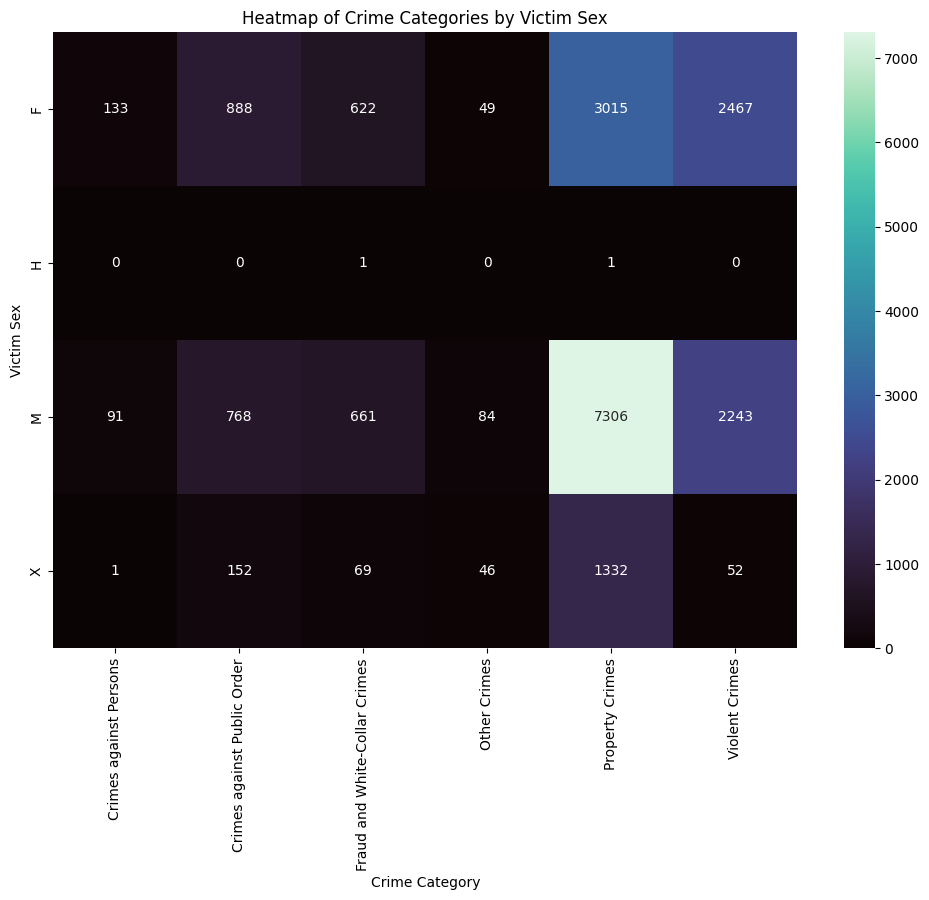

In [45]:
contingency_table_sex_crime=pd.crosstab(df['Victim_Sex'],df['Crime_Category'])
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table_sex_crime,cmap='mako', annot=True, fmt='d', cbar=True)
plt.title('Heatmap of Crime Categories by Victim Sex')
plt.xlabel('Crime Category')
plt.ylabel('Victim Sex')
plt.show()

In [46]:
from scipy.stats import chi2_contingency
result=[]
categorical_crime_relation = pd.DataFrame(columns=['Features','Significant_Relation_with_Crime_Category'])
# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_sex_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Victim_Sex','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Victim_Sex','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 1613.11
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.


#### Insights

- **Property Crimes** are the most common across all genders, with **males** having the highest incidence, followed by **females** and **non-binary/unknown** individuals.
- **Violent Crimes** also affect both **females** and **males** significantly.
- **Fraud and White-Collar Crimes** are less frequent but notable, especially among **females** and **males**.
- **Crimes against Persons** and other crime types are less common, with varying distributions by gender.
- **Homosexual** individuals have very few cases across all crime categories.
- There is a significant relationship between `Victim_Sex` and `Crime_Category`.


#### 4.4.2 Part 1-2 COLUMN
- How is Crime Type wise distribution ?
- Is Crime Type  has any impact on Crime Category ?

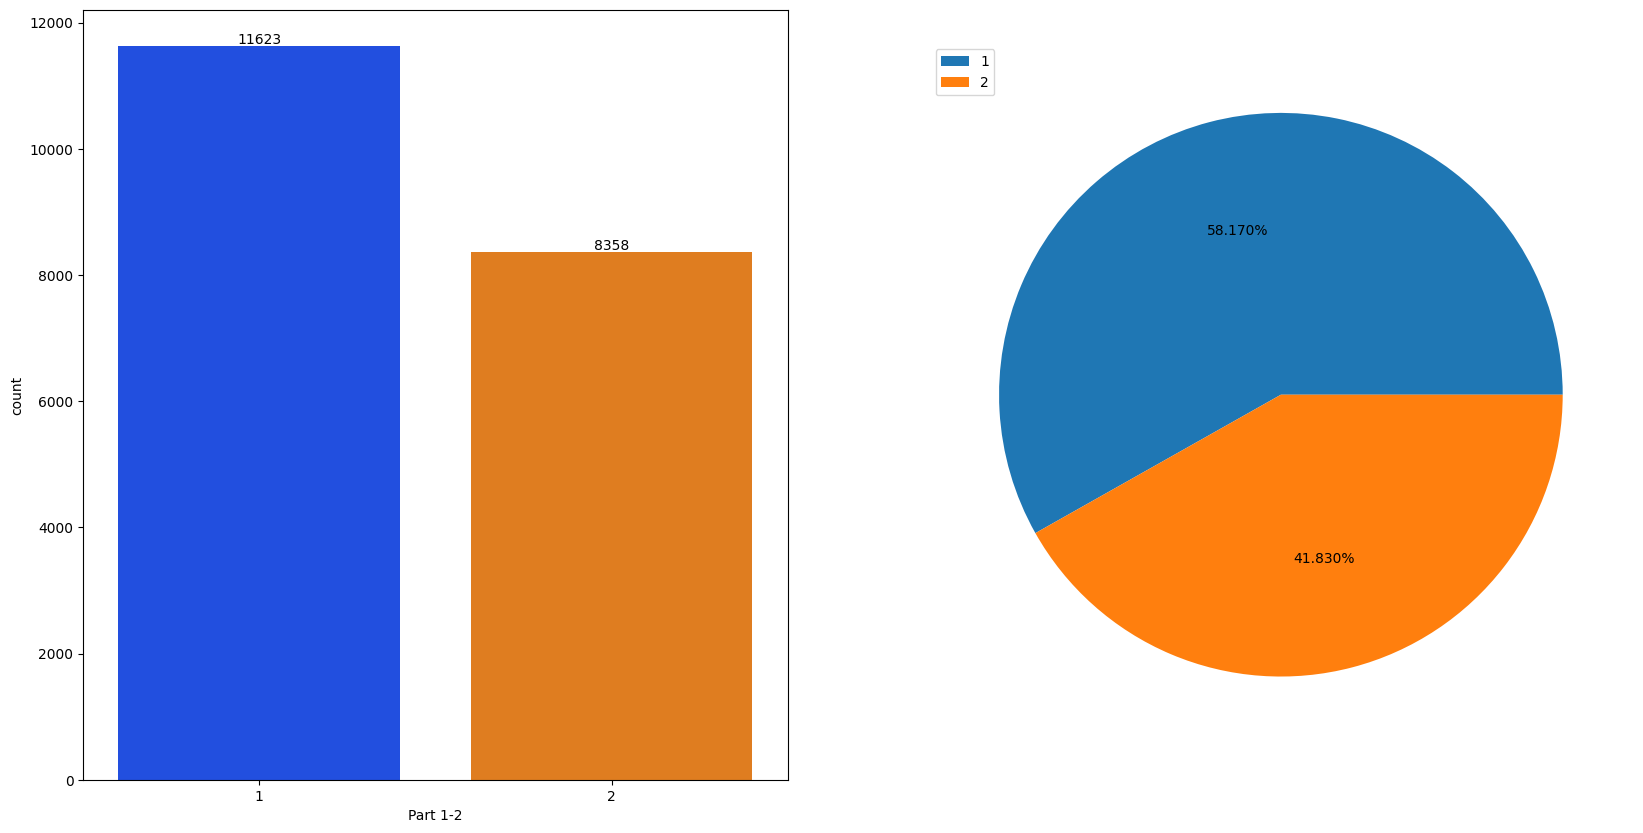

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(data=df,x='Part 1-2',palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

plt.subplot(122)
plt.pie(part_count,labels=None,autopct='%1.3f%%')
plt.legend(part_count.index,loc='upper left')

plt.show()



#### Insights 
- Part-1 Type Crimes dominate with 11623 Crimes over Part-2 Crimes with 8358 cases

#### BIVARIATE ANALYSIS ( Is Crime Type  has any impact on Crime Category ?)

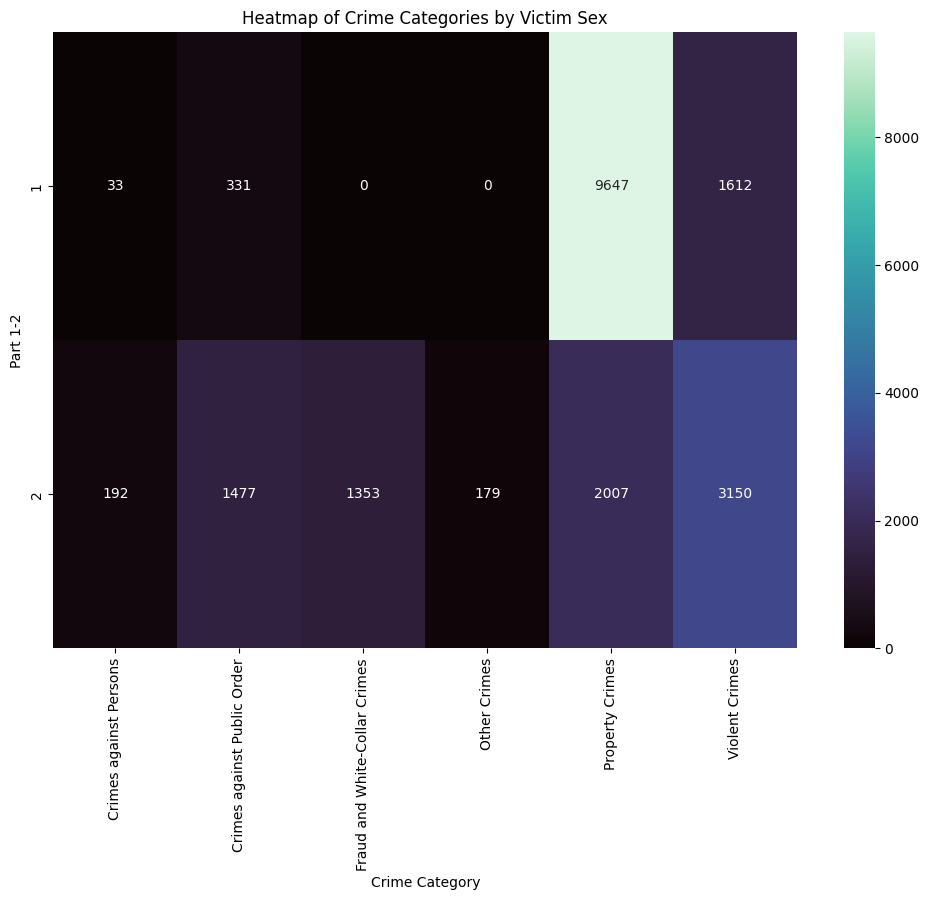

In [48]:
contingency_table_part_crime=pd.crosstab(df['Part 1-2'],df['Crime_Category'])
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table_part_crime,cmap='mako', annot=True, fmt='d', cbar=True)
plt.title('Heatmap of Crime Categories by Victim Sex')
plt.xlabel('Crime Category')
plt.ylabel('Part 1-2')
plt.show()

In [49]:

# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_part_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Part 1-2','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Part 1-2','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 7543.95
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.


#### Insights 

- **Part 1 Crimes** are dominated by Property Crimes, with a significant number of Violent Crimes. Other crime categories are minimal or absent.
- **Part 2 Crimes** show a diverse range, with a high number of Fraud and White-Collar Crimes and Crimes against Public Order. Property Crimes and Violent Crimes are also present but less prevalent compared to Part 1.
- There is a significant relationship between the `Part 1-2` classification and `Crime_Category`, as confirmed by the Chi-Square test.



#### 4.4.3 Victim_Descent COLUMN
- How is Victim's Descent wise distribution ?
- Is Victim's Descent  has any impact on Crime Category ?

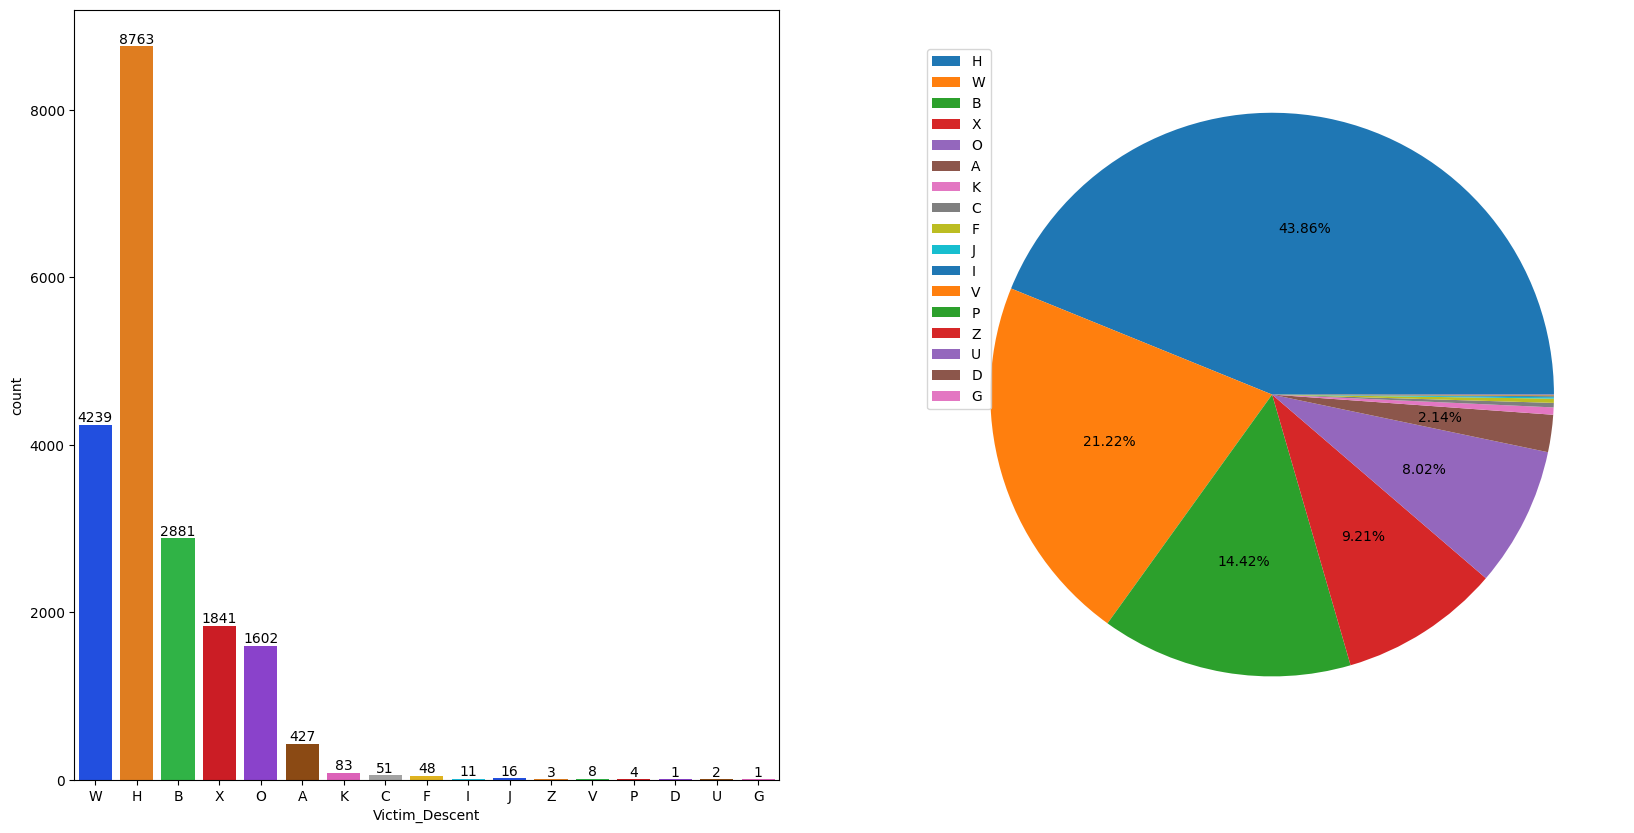

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(data=df,x='Victim_Descent',palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

plt.subplot(122)
plt.pie(df.Victim_Descent.value_counts(),labels=None,autopct=autopct_func)
plt.legend(df.Victim_Descent.value_counts().index,loc='upper left')

plt.show()

In [51]:
contingency_table_Descent_crime=pd.crosstab(df['Victim_Descent'],df['Crime_Category'])

# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_Descent_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Victim_Descent','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Victim_Descent','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 1491.39
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.



#### 4.4.4 Area_Name COLUMN
- How is Area_Name wise distribution ?
- Is Area_Name  has any impact on Crime Category ?

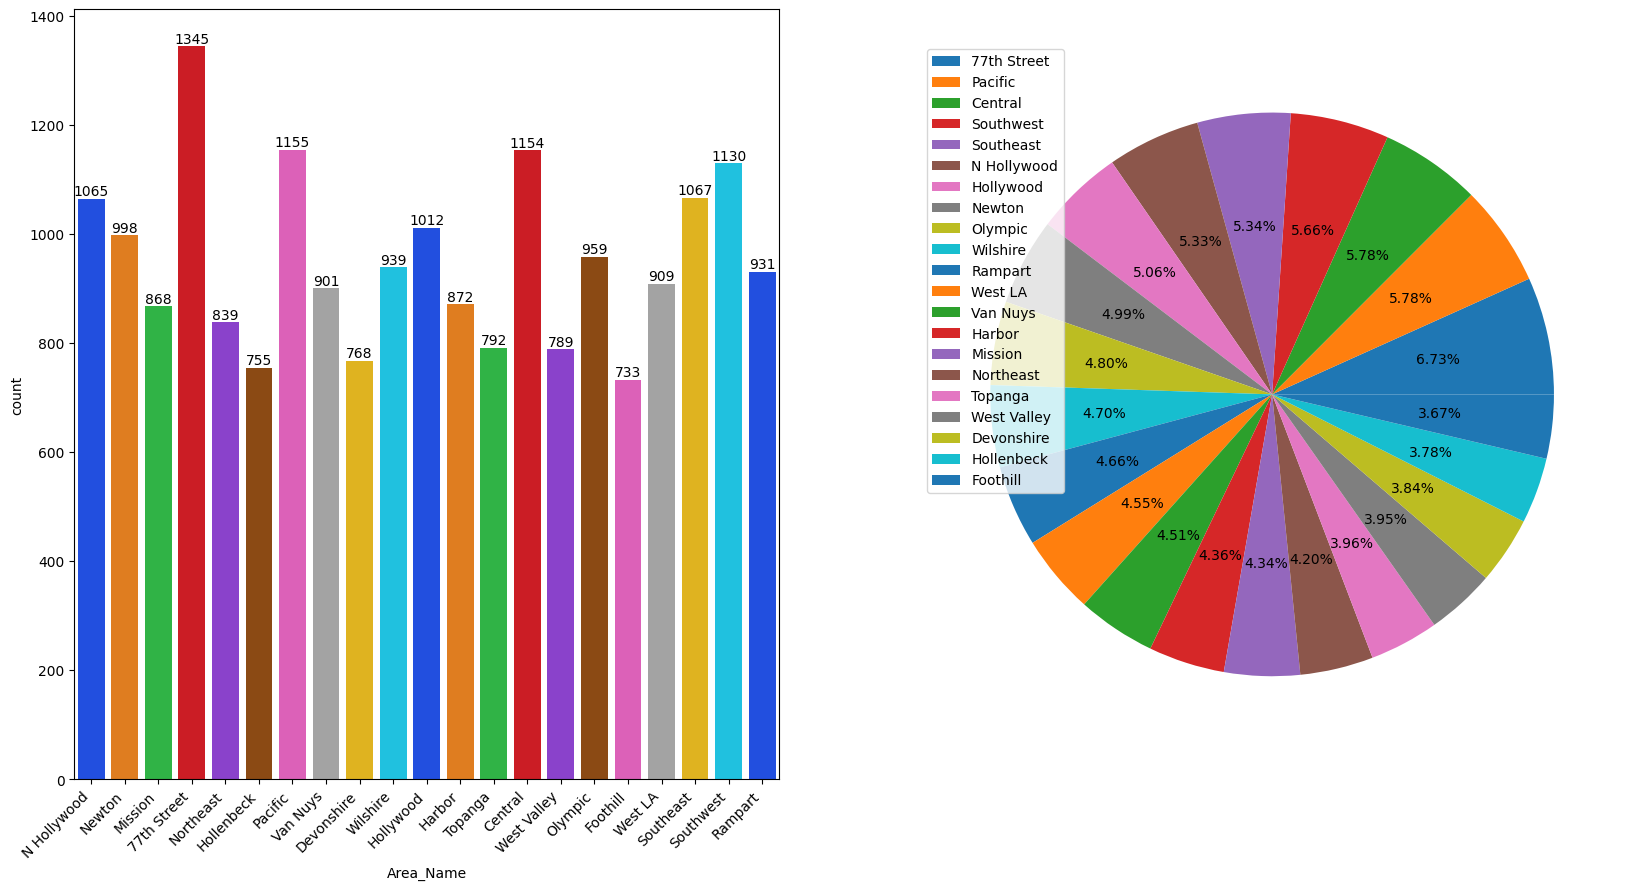

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(data=df,x='Area_Name',palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')

plt.subplot(122)
plt.pie(df.Area_Name.value_counts(),labels=None,autopct=autopct_func)
plt.legend(df.Area_Name.value_counts().index,loc='upper left')

plt.show()

In [53]:
contingency_table_Area_crime=pd.crosstab(df['Area_Name'],df['Crime_Category'])

# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_Area_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Area_Name','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Area_Name','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 615.20
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.


#### 4.4.5 Reporting_District_no COLUMN
- Is Reporting_District_no  has any impact on Crime Category ?

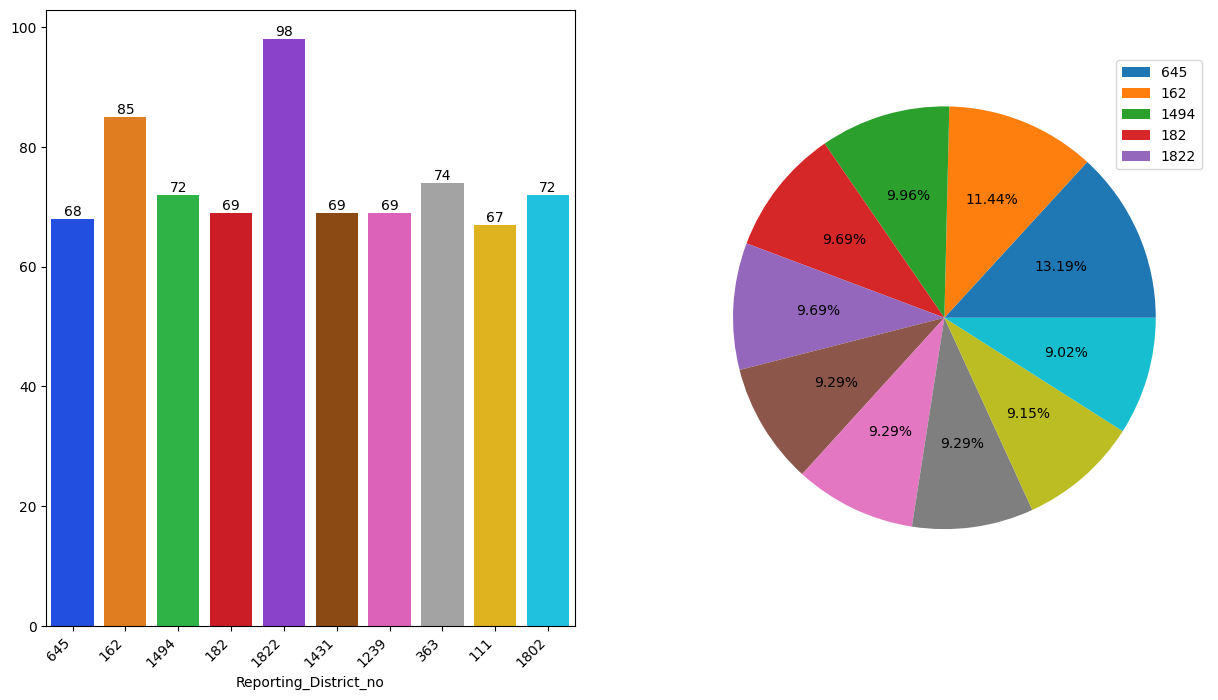

In [54]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.barplot(x=df.Reporting_District_no.value_counts().nlargest(10).index,y=df.Reporting_District_no.value_counts().nlargest(10).values,palette='bright',ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=10)
axs[0].set_xticklabels(df.Reporting_District_no.value_counts().nlargest(10).index , rotation=45 , ha='right')

plt.subplot(122)
wedges,text,auto_texts=axs[1].pie(df.Reporting_District_no.value_counts().nlargest(10),labels=None,autopct=autopct_func)
axs[1].legend(wedges[:5],df.Reporting_District_no.value_counts().nlargest(5).index,loc='upper right')
plt.show()

In [55]:
contingency_table_District_crime=pd.crosstab(df['Reporting_District_no'],df['Crime_Category'])

# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_District_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Reporting_District_no','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Reporting_District_no','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 6767.27
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.



#### 4.4.6 Premise_Description COLUMN
- Is Premise_Description  has any impact on Crime Category ?

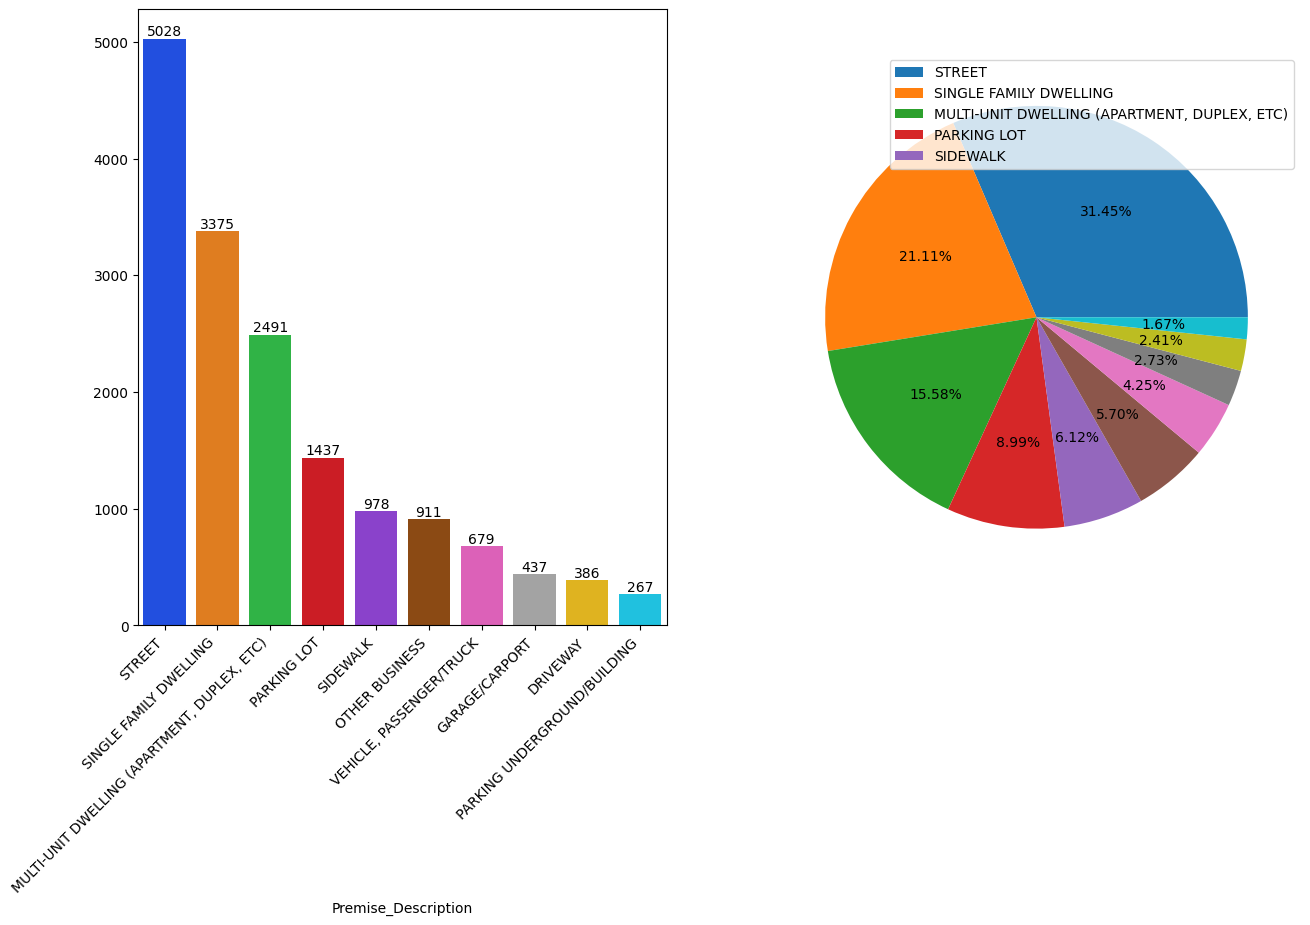

In [56]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.barplot(x=df.Premise_Description.value_counts().nlargest(10).index,y=df.Premise_Description.value_counts().nlargest(10).values,palette='bright',ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=10)
axs[0].set_xticklabels(df.Premise_Description.value_counts().nlargest(10).index , rotation=45 , ha='right')

plt.subplot(122)
wedges,text,auto_texts=axs[1].pie(df.Premise_Description.value_counts().nlargest(10),labels=None,autopct=autopct_func)
axs[1].legend(wedges[:5],df.Premise_Description.value_counts().nlargest(5).index,loc='upper right')
plt.show()

In [57]:
contingency_table_Premise_crime=pd.crosstab(df['Premise_Description'],df['Crime_Category'])

# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_Premise_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Premise_Description','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Premise_Description','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 7305.87
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.



#### 4.4.7 Weapon_Description COLUMN
- How is Weapon_Description  wise distribution ?
- Is Weapon_Description   has any impact on Crime Category ?

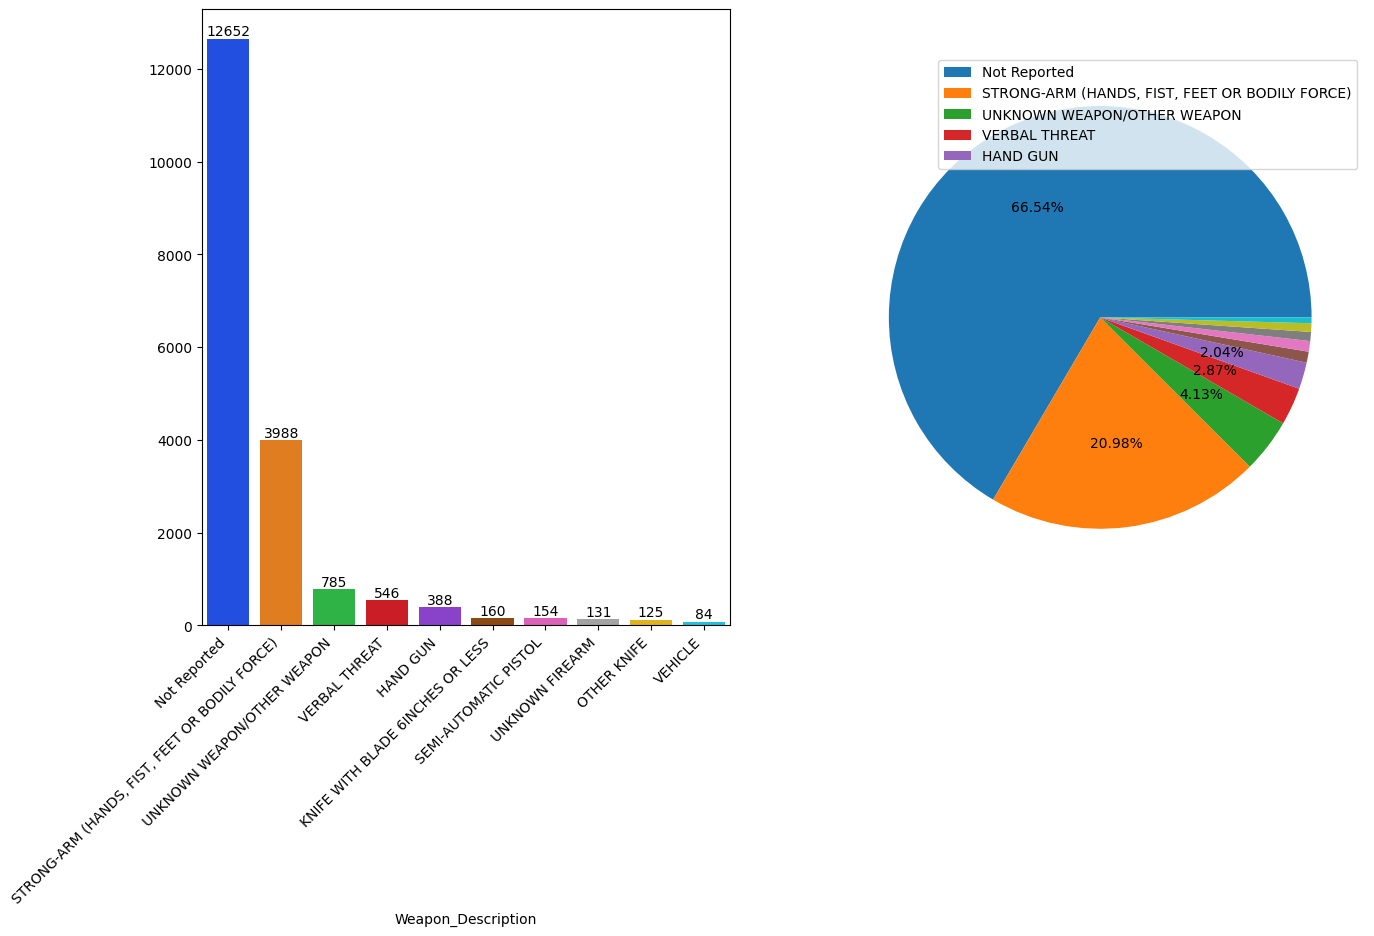

In [58]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.barplot(x=df.Weapon_Description.value_counts().nlargest(10).index,y=df.Weapon_Description.value_counts().nlargest(10).values,palette='bright',ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=10)
axs[0].set_xticklabels(df.Weapon_Description.value_counts().nlargest(10).index , rotation=45 , ha='right')

plt.subplot(122)
wedges,text,auto_texts=axs[1].pie(df.Weapon_Description.value_counts().nlargest(10),labels=None,autopct=autopct_func)
axs[1].legend(wedges[:5],df.Weapon_Description.value_counts().nlargest(5).index,loc='upper right')
plt.show()

In [59]:
contingency_table_Weapon_crime=pd.crosstab(df['Weapon_Description'],df['Crime_Category'])

# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_Weapon_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Weapon_Description','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Weapon_Description','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 19149.71
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.



#### 4.4.8 Status COLUMN
- How is Status wise distribution ?
- Is Status  has any impact on Crime Category ?

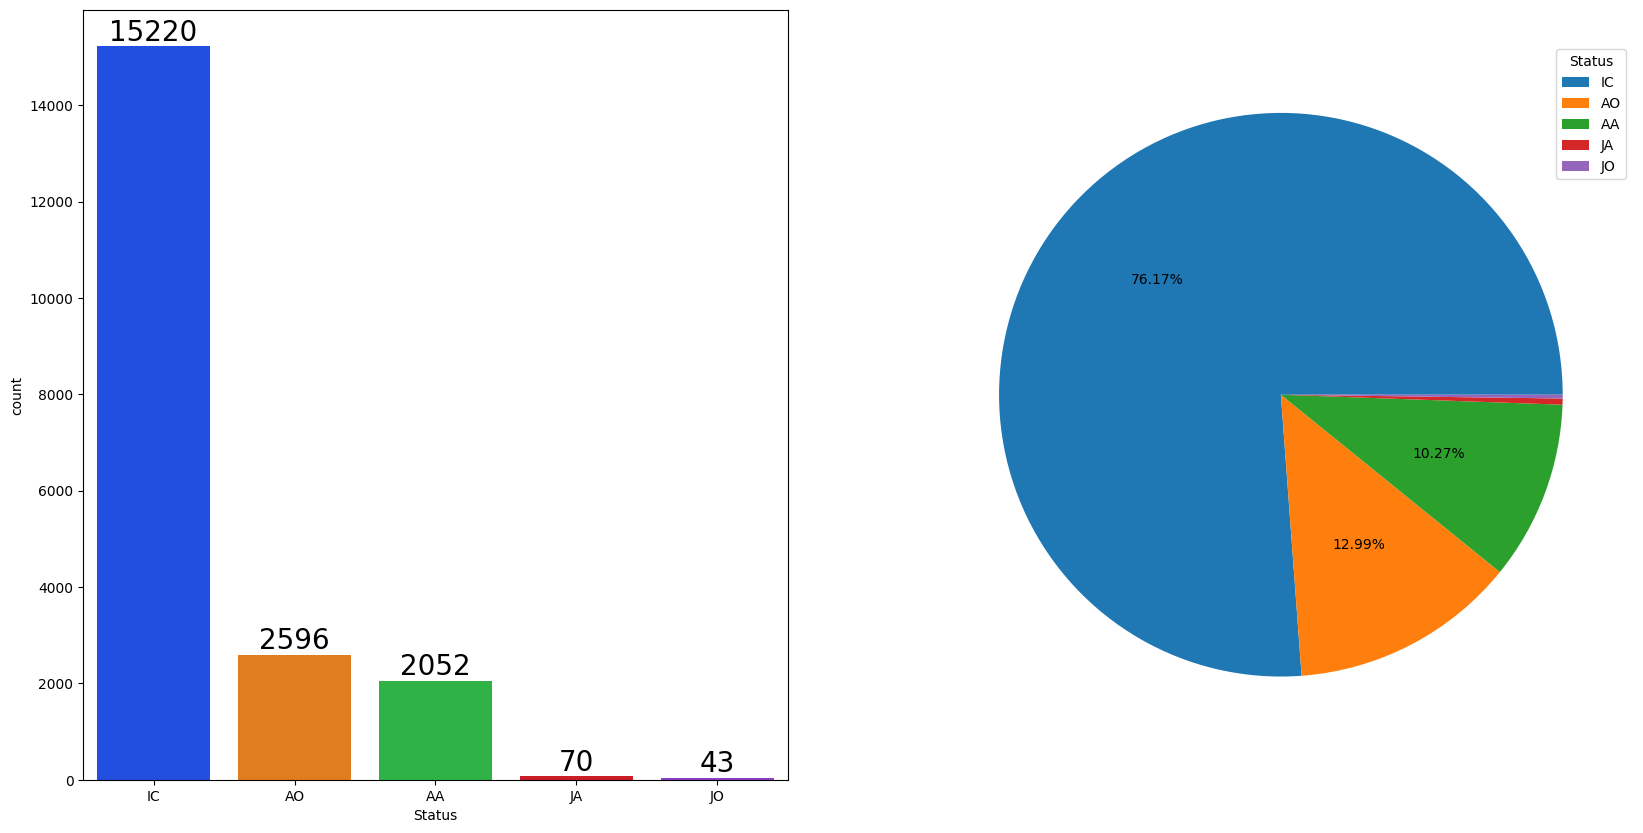

In [60]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(data=df,x='Status',palette='bright')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(122)
wedges,text,auto_texts=plt.pie(status_count,labels=None,autopct=autopct_func)
plt.legend(wedges,status_count.index,loc='upper right',title='Status')

plt.show()

In [61]:
contingency_table_Status_crime=pd.crosstab(df['Status'],df['Crime_Category'])

# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_Status_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Status','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Status','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 3708.68
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.



#### 4.4.9 Location COLUMN
- Is Location  has any impact on Crime Category ?

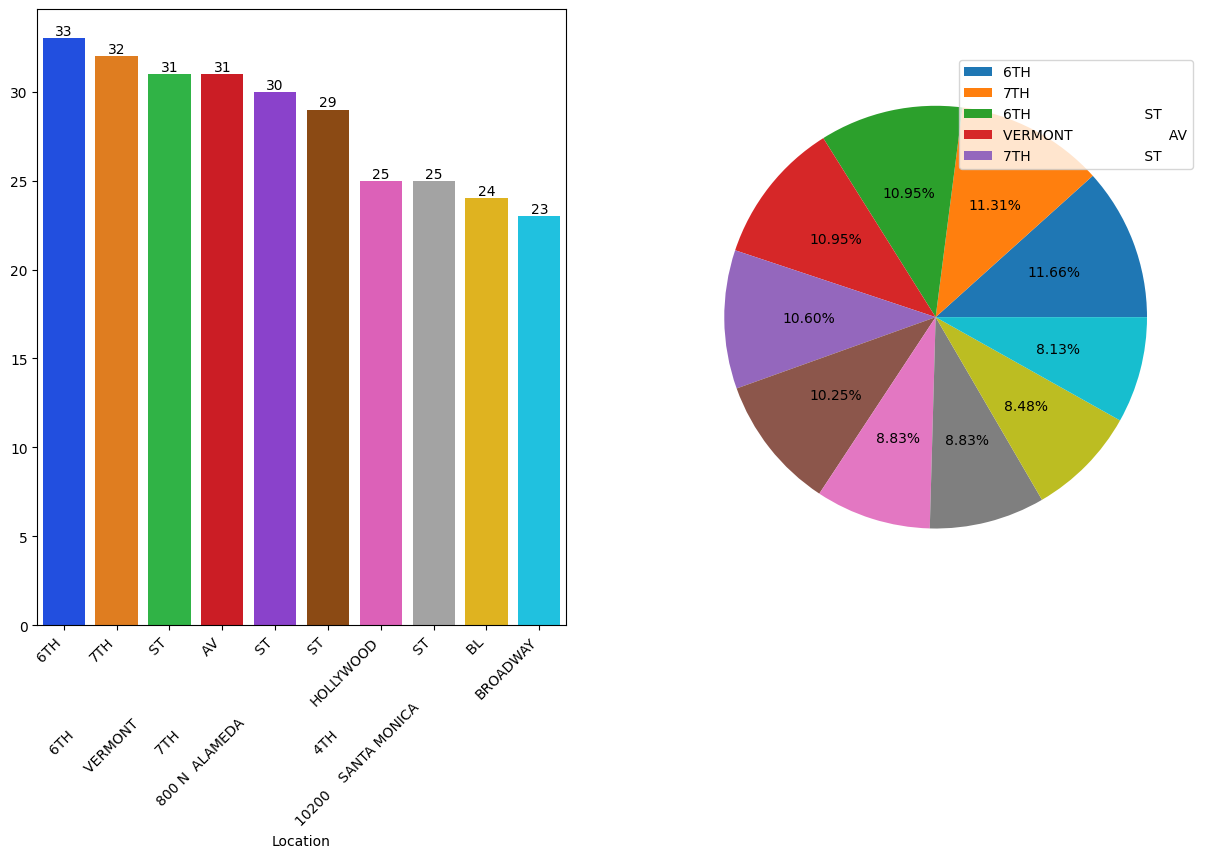

In [62]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.barplot(x=df.Location.value_counts().nlargest(10).index,y=df.Location.value_counts().nlargest(10).values,palette='bright',ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=10)
axs[0].set_xticklabels(df.Location.value_counts().nlargest(10).index , rotation=45 , ha='right')

plt.subplot(122)
wedges,text,auto_texts=axs[1].pie(df.Location.value_counts().nlargest(10),labels=None,autopct=autopct_func)
axs[1].legend(wedges[:5],df.Location.value_counts().nlargest(5).index,loc='upper right')
plt.show()

In [63]:
contingency_table_Location_crime=pd.crosstab(df['Location'],df['Crime_Category'])
# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_Location_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Location','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Location','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 66214.41
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.


#### 4.4.10 Modus_Operandi COLUMN
- Is Modus Operandi  has any impact on Crime Category ?

In [64]:
contingency_table_Modus_Operandi_crime=pd.crosstab(df['Modus_Operandi'],df['Crime_Category'])
# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table_Modus_Operandi_crime)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p:.4f}')

if p < 0.05:
    result.append({'Features':'Modus_Operandi','Significant_Relation_with_Crime_Category':'Yes'})
    print('There is a significant relationship between Victim_Sex and Crime_Category.')
else:
    result.append({'Features':'Modus_Operandi','Significant_Relation_with_Crime_Category':'No'})
    print('There is no significant relationship between Victim_Sex and Crime_Category.')
    

Chi-Square Statistic: 85950.41
P-Value: 0.0000
There is a significant relationship between Victim_Sex and Crime_Category.


In [65]:

categorical_crime_relation = pd.DataFrame(result)
categorical_crime_relation

,Features,Significant_Relation_with_Crime_Category
0,Victim_Sex,Yes
1,Part 1-2,Yes
2,Victim_Descent,Yes
3,Area_Name,Yes
4,Reporting_District_no,Yes
5,Premise_Description,Yes
6,Weapon_Description,Yes
7,Status,Yes
8,Location,Yes
9,Modus_Operandi,Yes


#### 4.4.11 Bivariant analysis on Numerical Features?
- On which numerical feature's `Crime_Category` depends ?

In [71]:
from scipy.stats import f_oneway

results = []  

numerical_crime_relation=pd.DataFrame(columns=['Features','Significant_Relation_with_Crime_Category'])
for i in df.select_dtypes(include='number').columns.tolist():
    groups = [group[i].values for name, group in df.groupby('Crime_Category')]

    # Perform the ANOVA test
    anova_result = f_oneway(*groups)
    
    if anova_result.pvalue < 0.05:
        relation = 'Yes'
    else:
        relation = 'No'
    
    results.append({'Feature': i, 'Significant_Relation_with_Crime_Category': relation})

numerical_crime_relation = pd.DataFrame(results)
numerical_crime_relation



,Feature,Significant_Relation_with_Crime_Category
0,Latitude,Yes
1,Longitude,Yes
2,Victim_Age,Yes
3,Hours_Occurred,Yes
4,Reported_Year,Yes
5,Reported_Month,Yes
6,Reported_Day,No
7,Reported_Weekday,Yes
8,Occurred_Year,No
9,Occurred_Month,No


#### 4.4.12 Checking Outliers

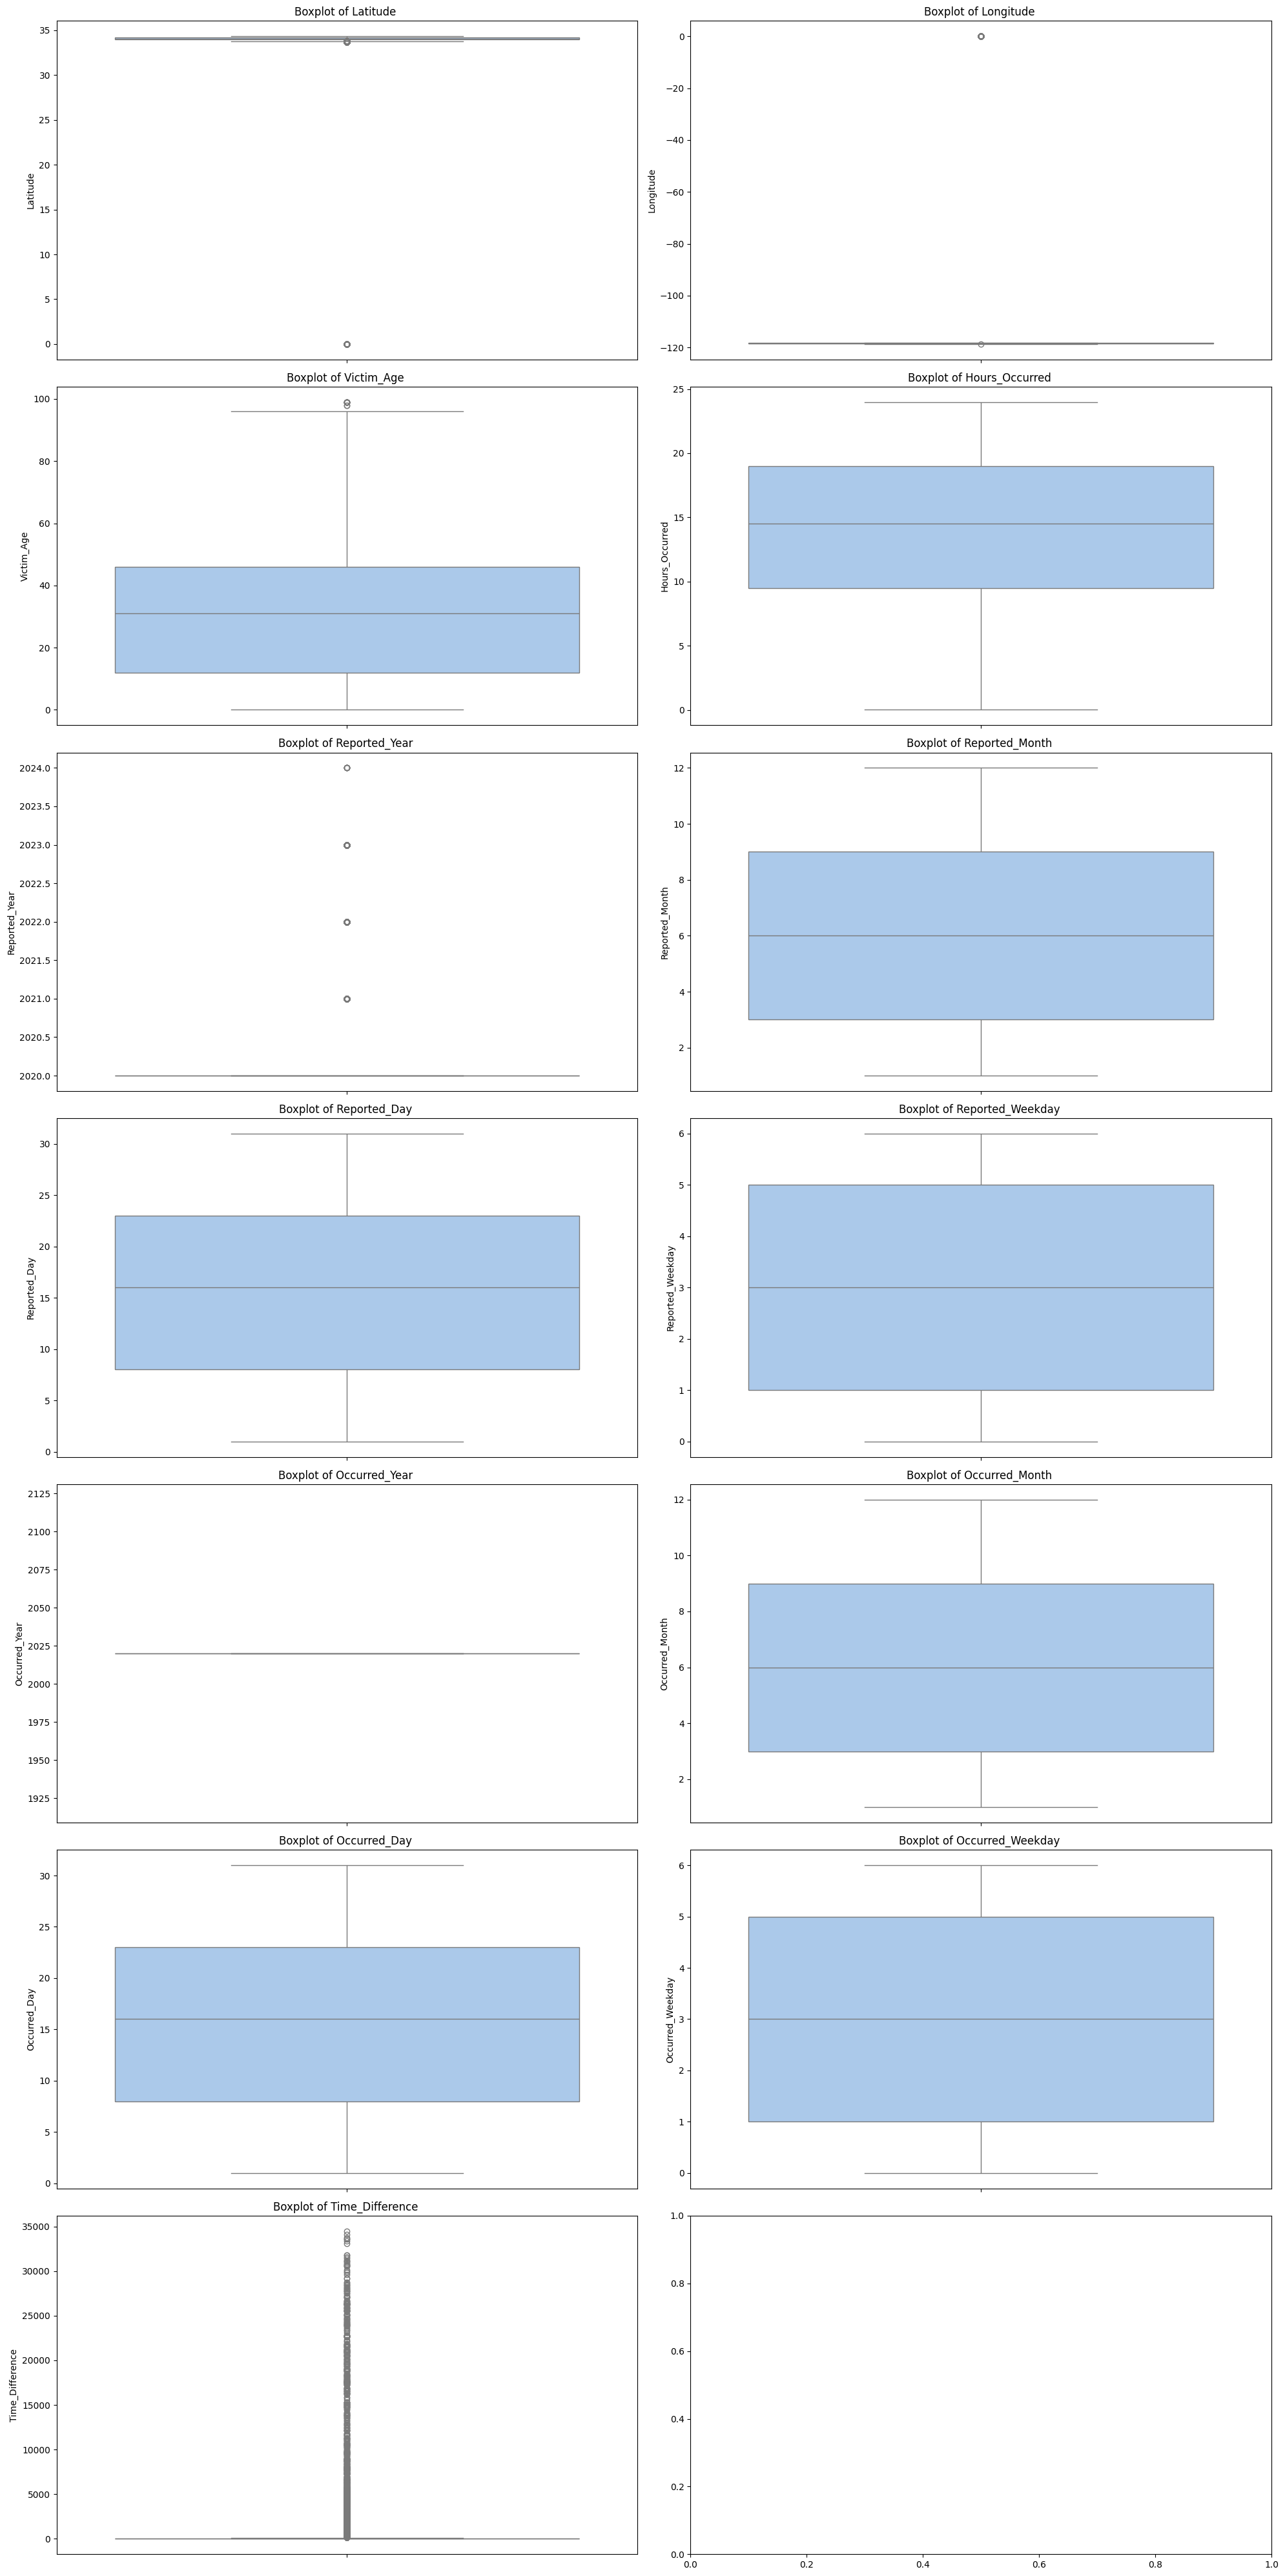

In [67]:
features_to_plot = [
    'Latitude', 
    'Longitude', 
    'Victim_Age', 
    'Hours_Occurred', 
    'Reported_Year', 
    'Reported_Month', 
    'Reported_Day', 
    'Reported_Weekday', 
    'Occurred_Year', 
    'Occurred_Month', 
    'Occurred_Day', 
    'Occurred_Weekday', 
    'Time_Difference'
]


plt.subplots(7, 2, figsize=(20, 40))


for idx, feature in enumerate(features_to_plot):
    plt.subplot(7, 2, idx + 1)  
    sns.boxplot( data=df[feature], palette='pastel')  # Using pastel colors
    plt.title(f'Boxplot of {feature} ')
    plt.xticks(rotation=45)  

# Adjust layout
plt.tight_layout()
plt.show()

#### 4.4.12 MUTIVARIATE ANALYSIS USING Covariance Matrix and Pairplot
- Covariance Matrix

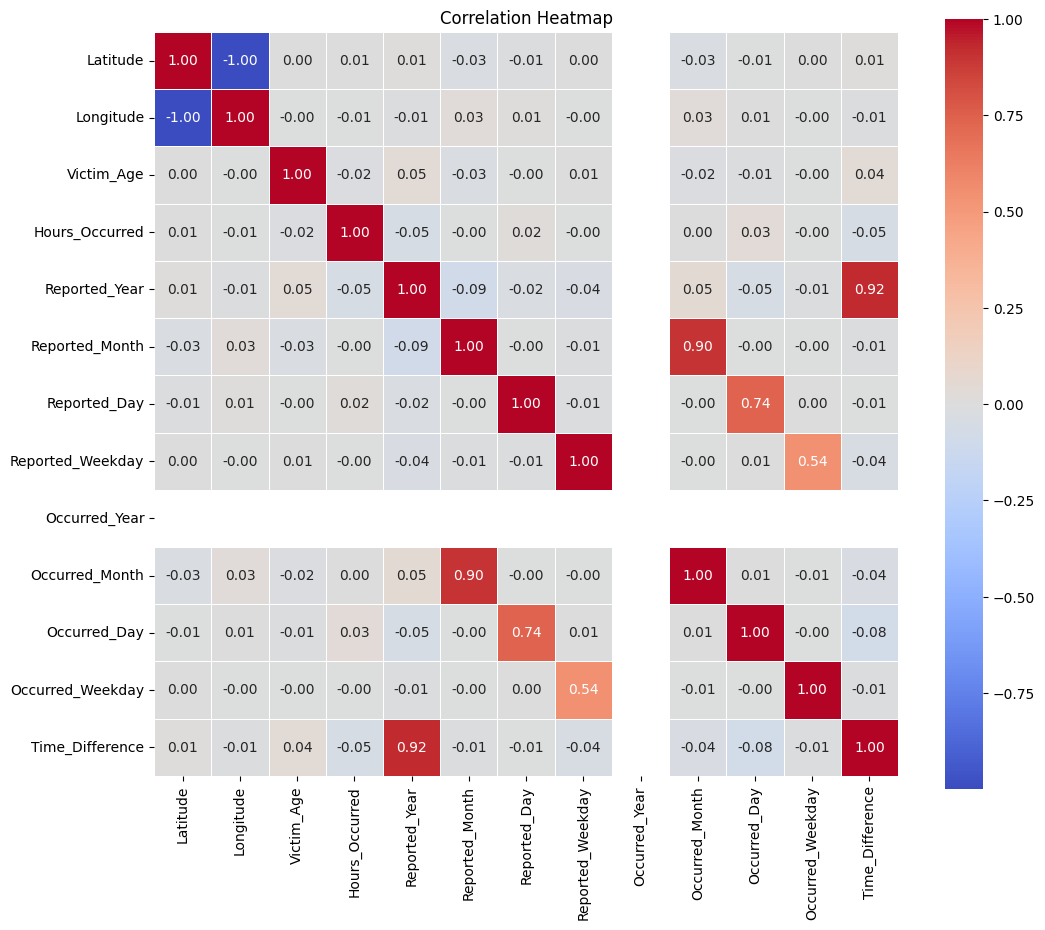

In [68]:
cor=df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 10))

sns.heatmap(cor,fmt='.2f',cmap='coolwarm',square=True,linewidths=0.5,annot=True)


plt.title('Correlation Heatmap')

plt.show()

- Pairplot

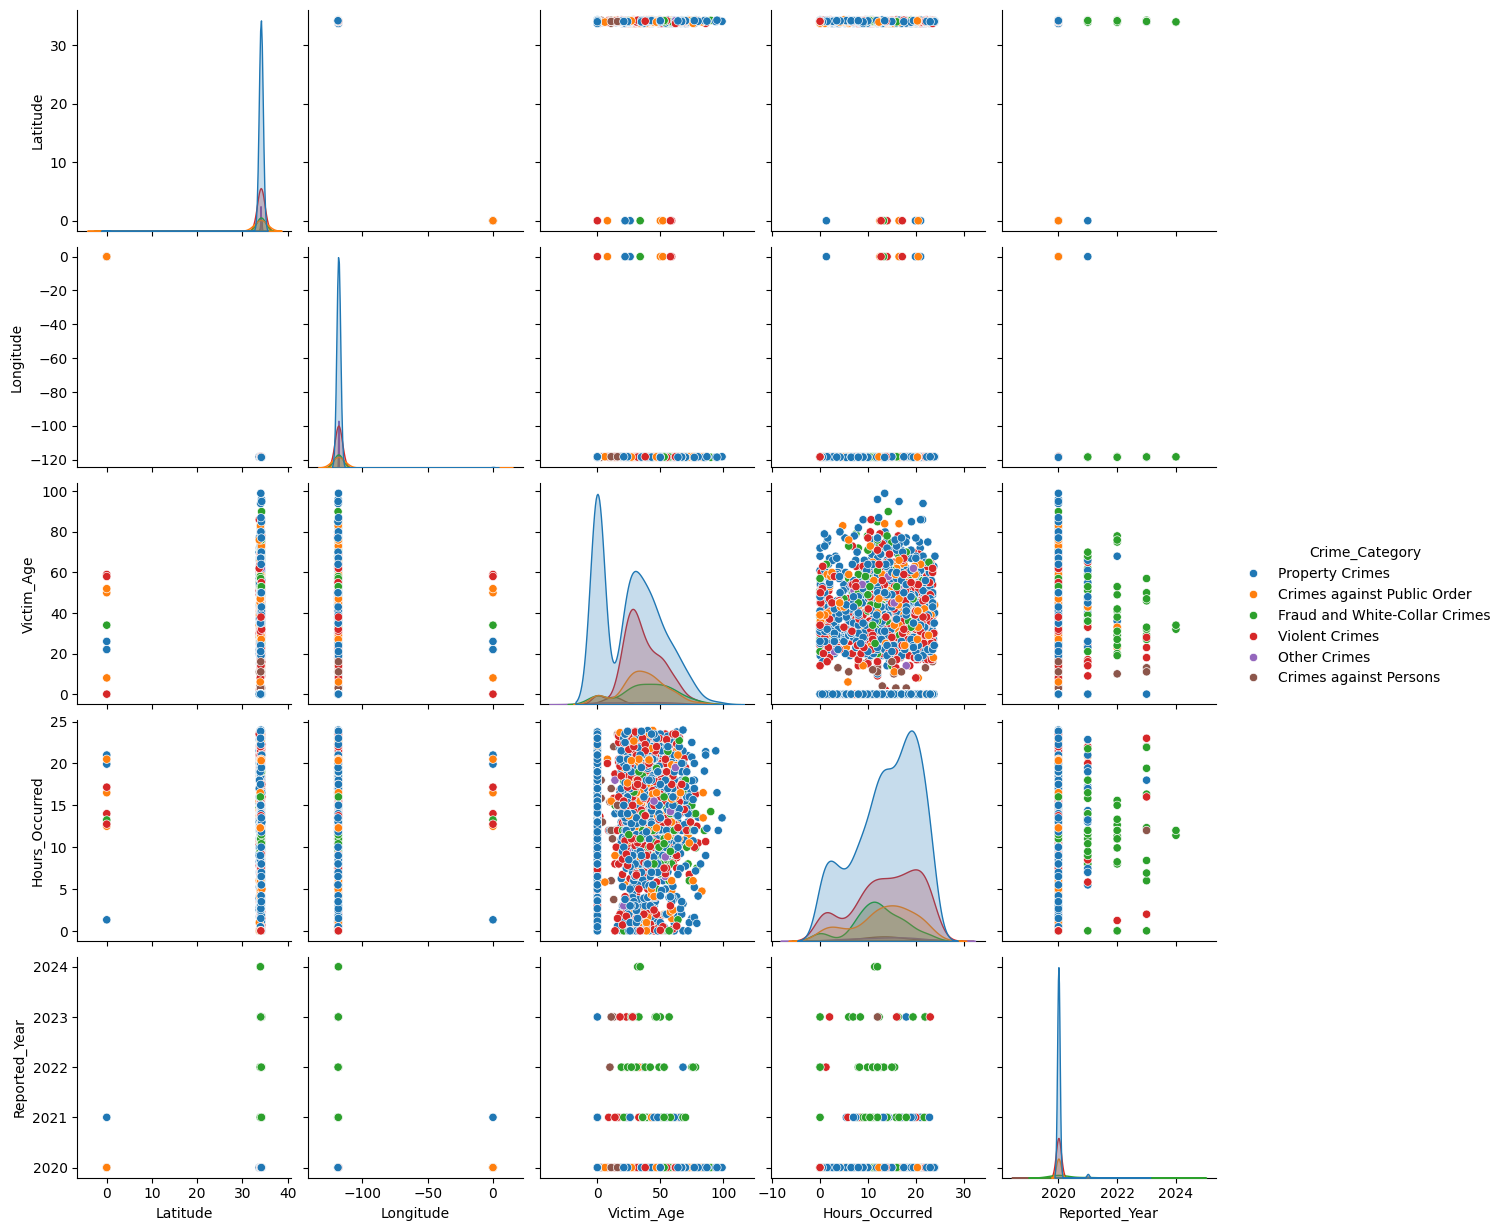

In [69]:

sampled_df=df.sample(frac=0.1,random_state=42)
features_to_include = [
    'Latitude',
    'Longitude',
    'Victim_Age',
    'Hours_Occurred',
    'Reported_Year'
]

sns.pairplot(sampled_df[features_to_include+['Crime_Category']],hue='Crime_Category')
plt.show()

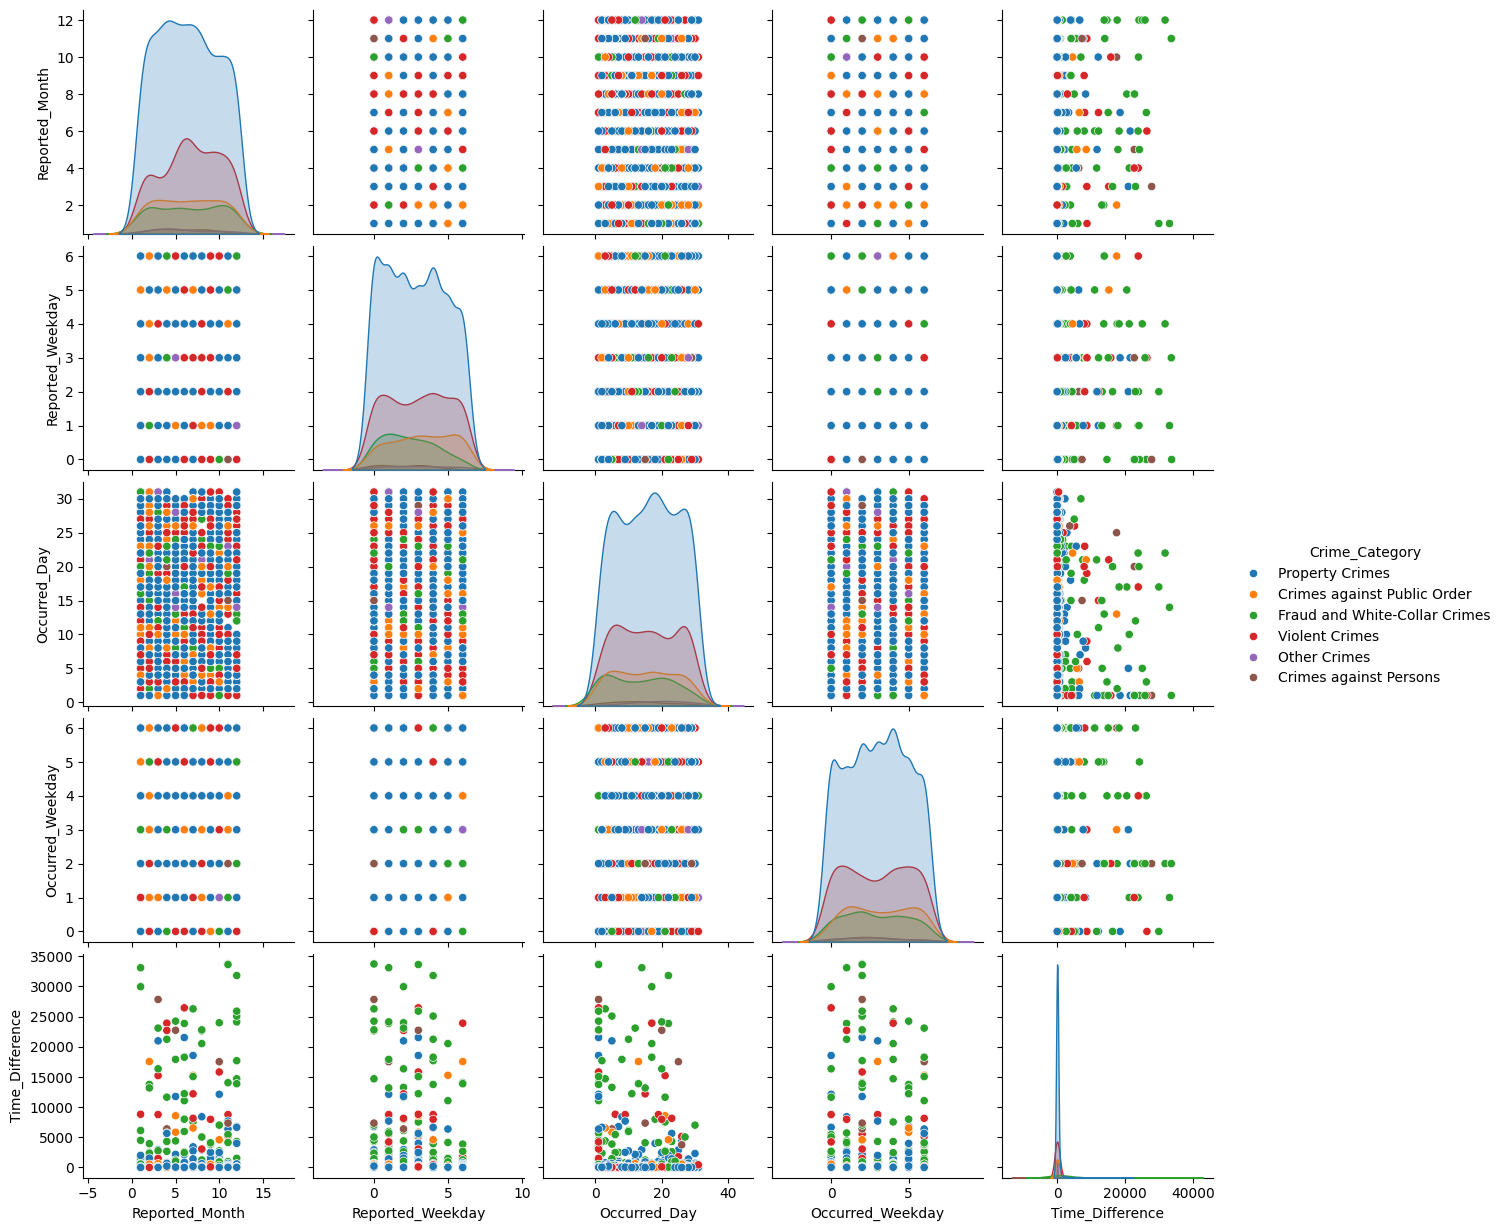

In [70]:
features_to_include = [
 
    'Reported_Month',
    'Reported_Weekday',
    'Occurred_Day',
    'Occurred_Weekday',
    'Time_Difference'
]

sns.pairplot(sampled_df[features_to_include+['Crime_Category']],hue='Crime_Category')
plt.show()

#### Insights
- The analysis suggests that the relationships between the numerical features and Crime_Category are non-linear

### 5. Conclusion 